In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate
import geopy.distance

import statsmodels.api as sm


from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
#from scipy.ndimage.filters import gaussian_filter

rcParams.update({'figure.autolayout': True})

In [2]:
data = pd.read_csv("data_husky.csv", low_memory=False)

In [3]:
def gaussian_filter(df, sigma):
    return scipy.ndimage.filters.gaussian_filter(df.power,sigma)

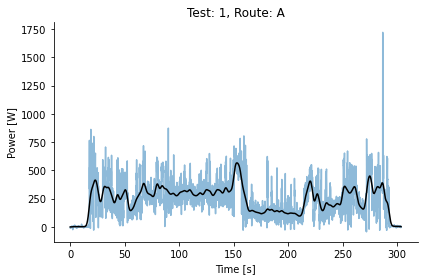

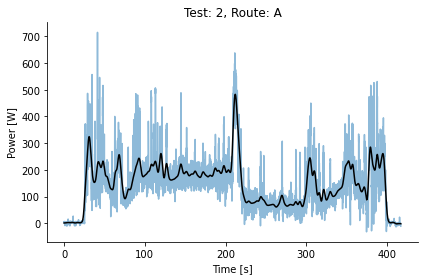

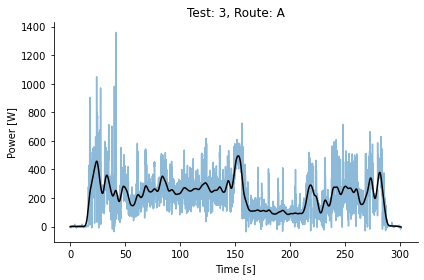

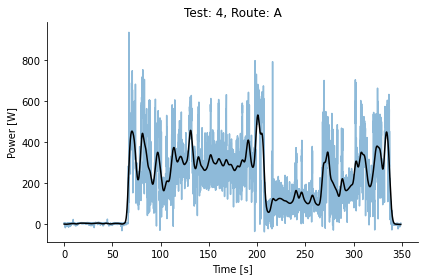

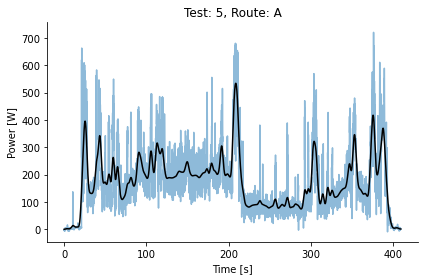

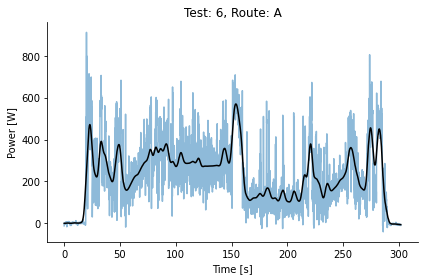

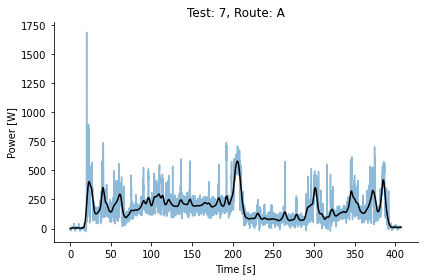

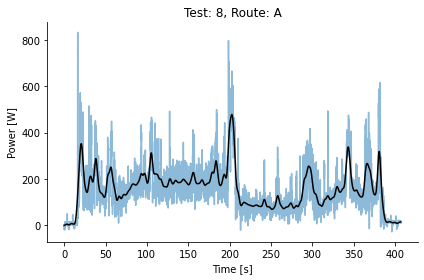

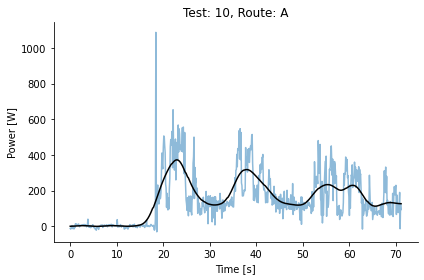

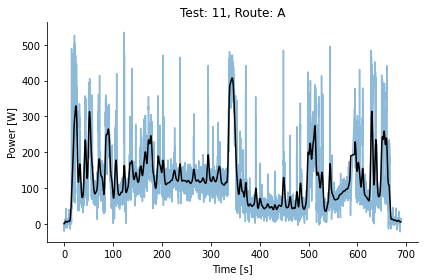

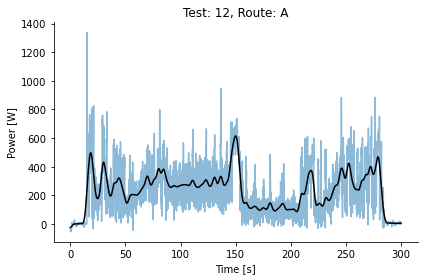

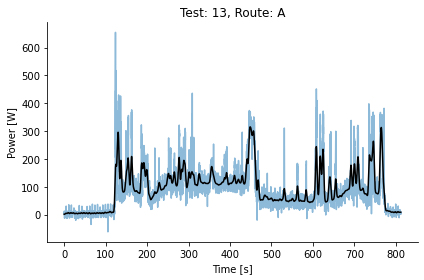

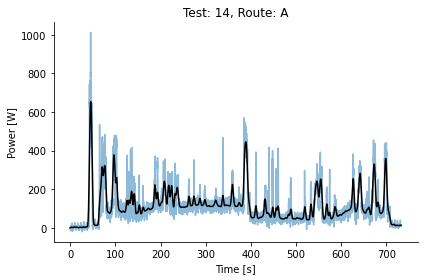

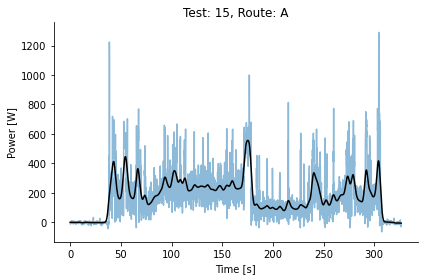

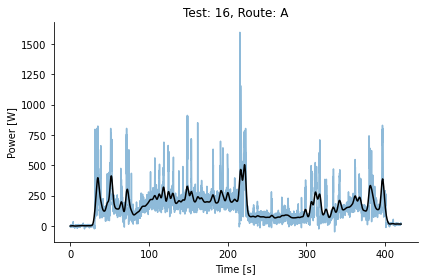

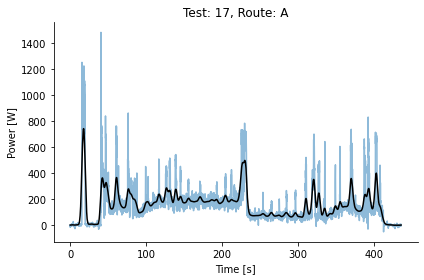

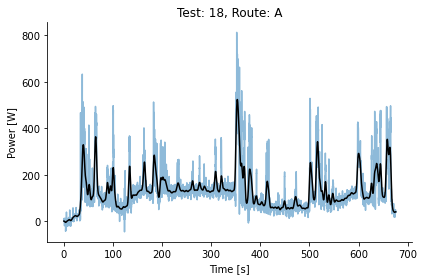

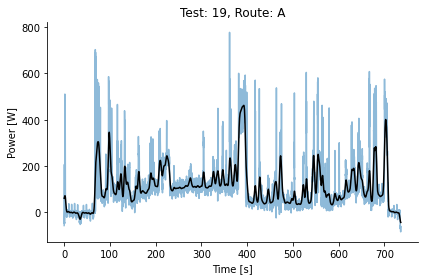

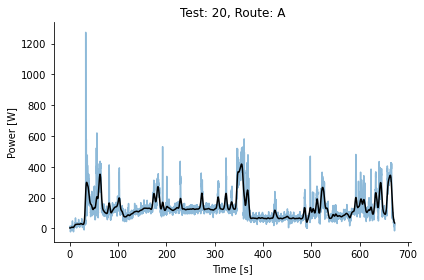

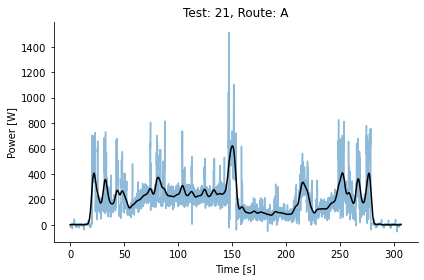

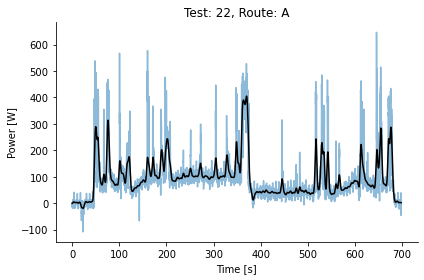

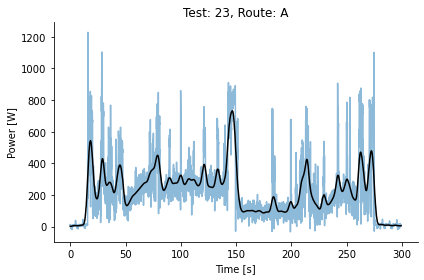

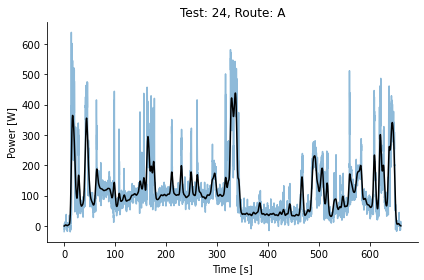

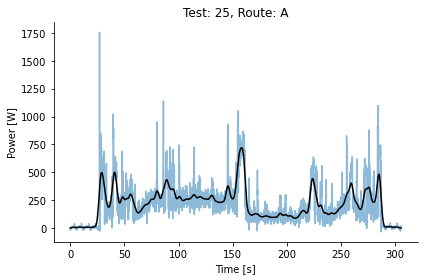

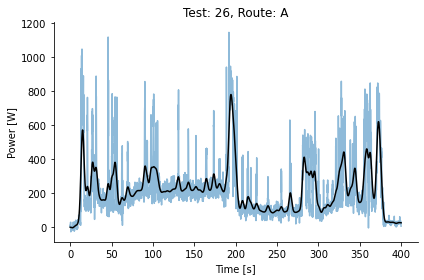

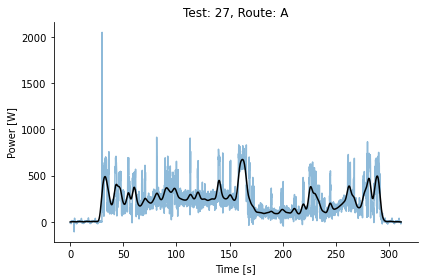

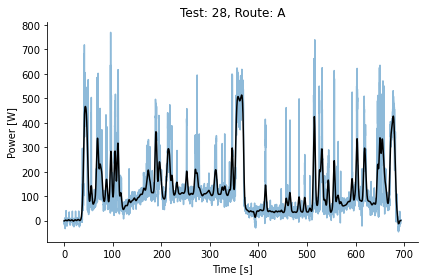

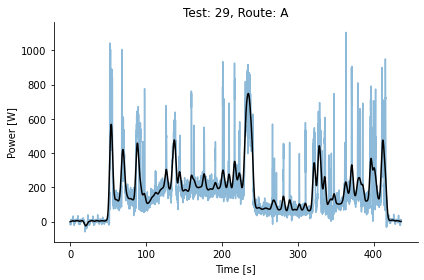

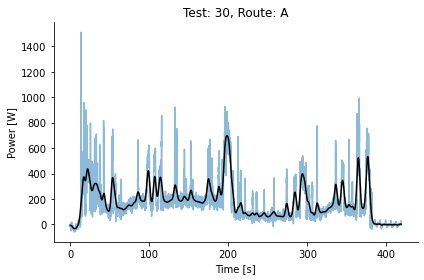

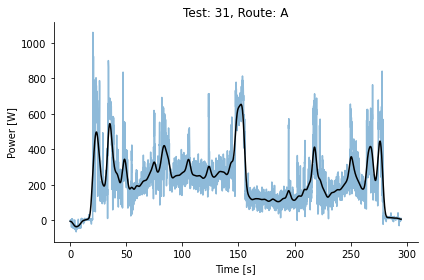

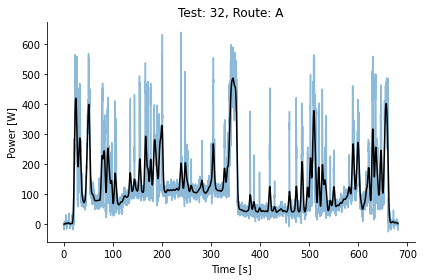

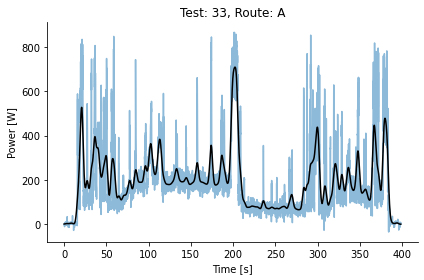

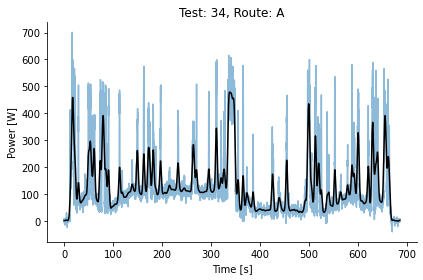

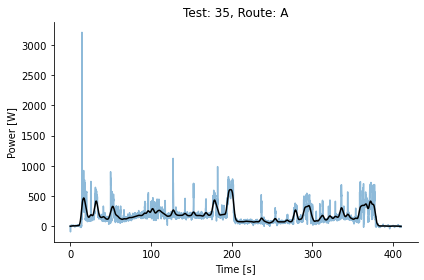

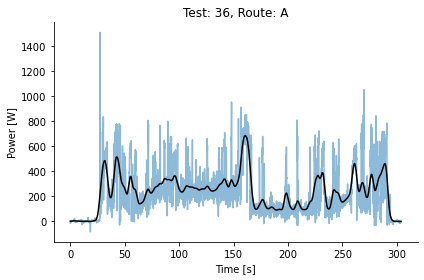

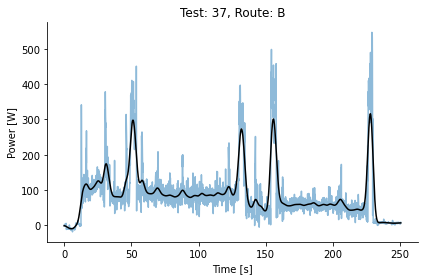

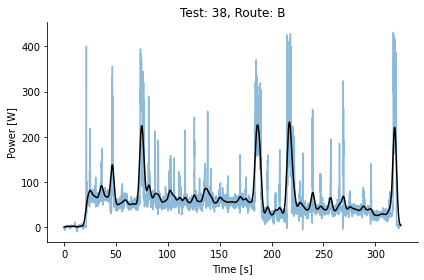

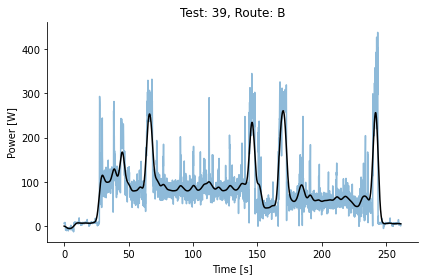

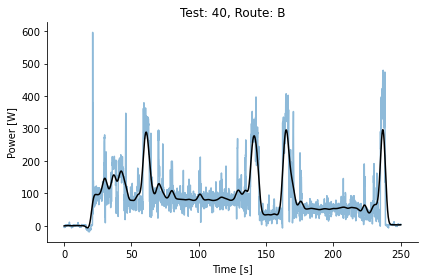

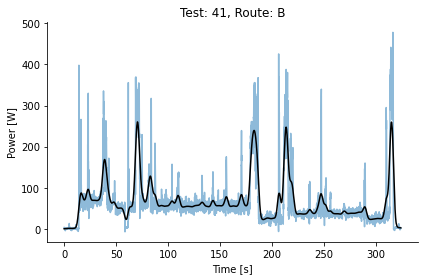

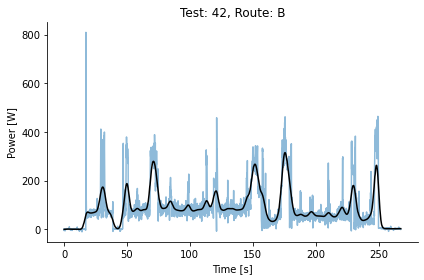

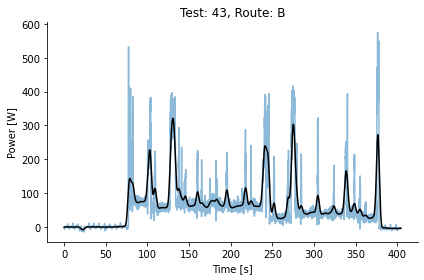

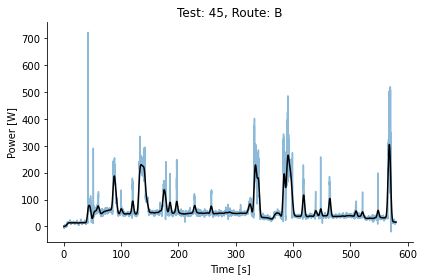

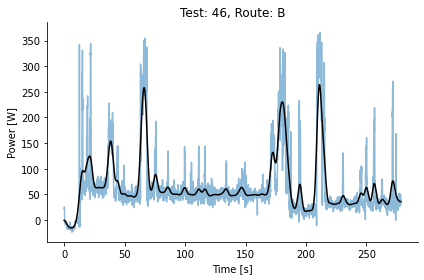

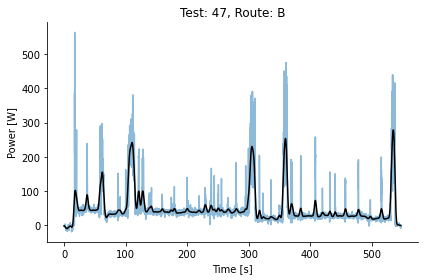

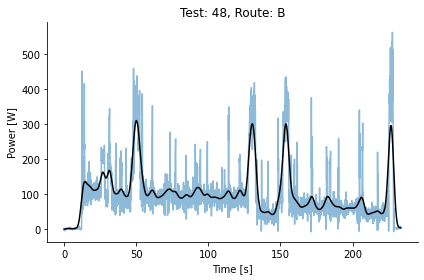

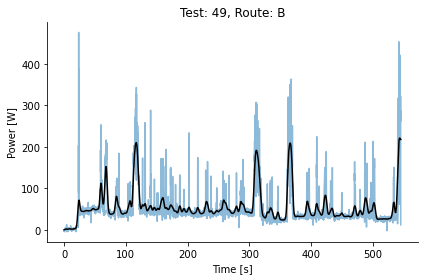

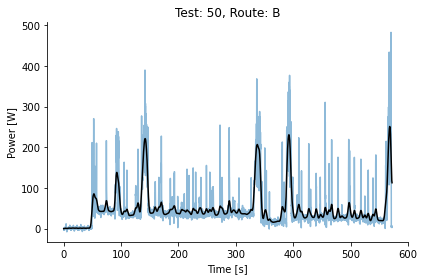

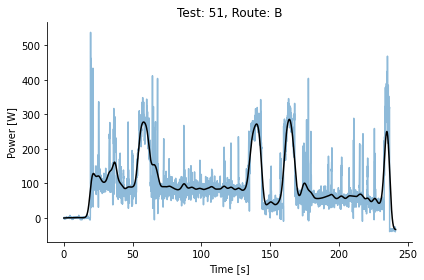

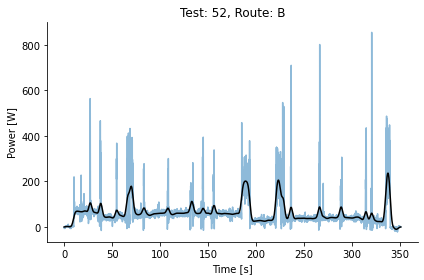

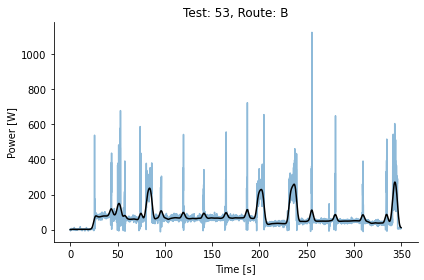

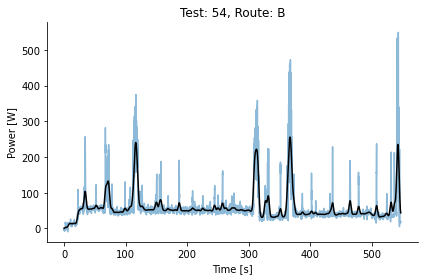

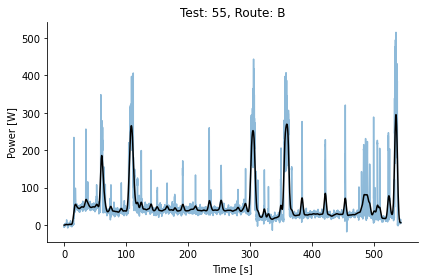

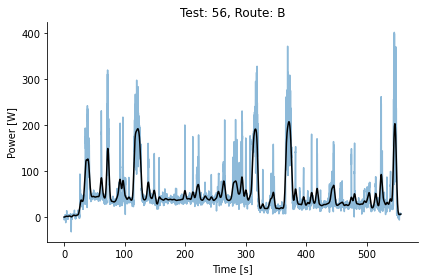

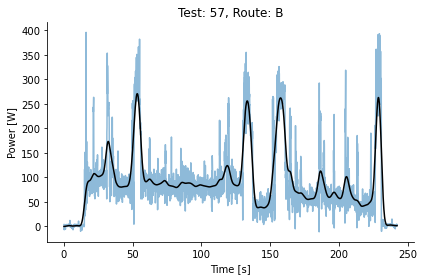

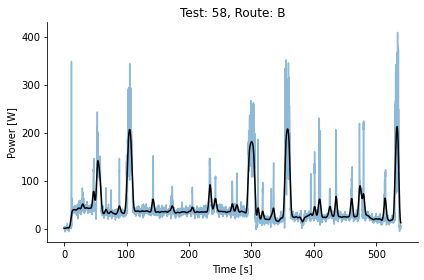

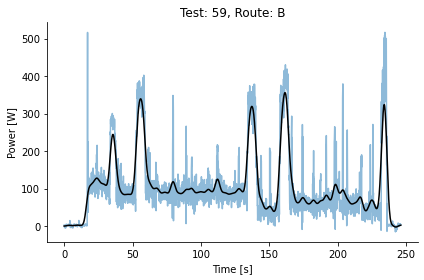

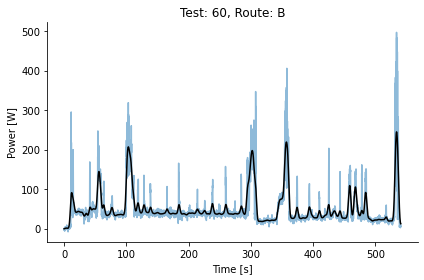

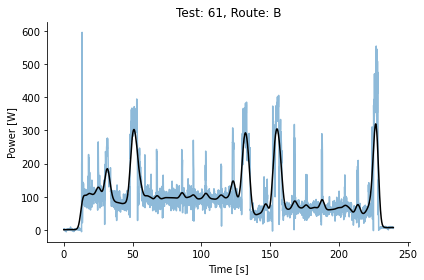

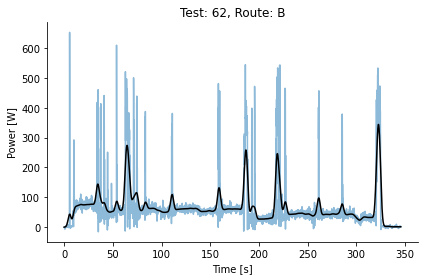

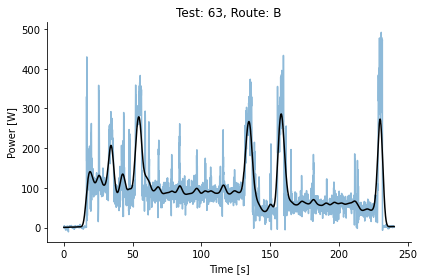

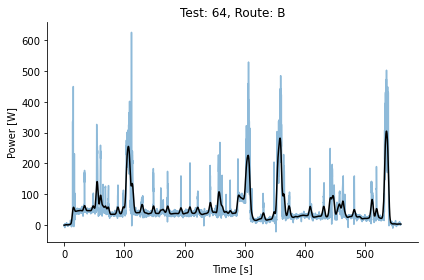

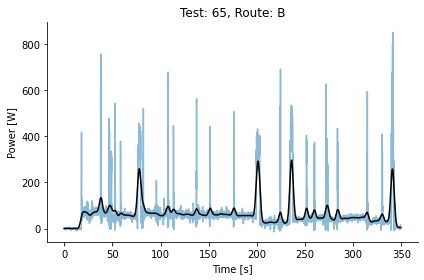

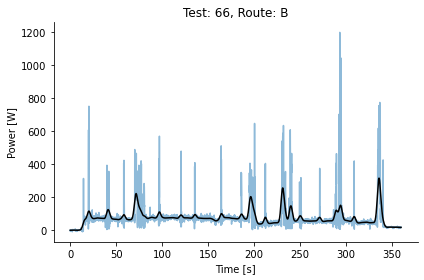

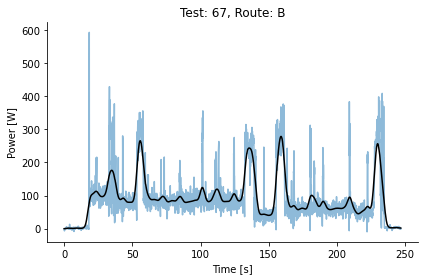

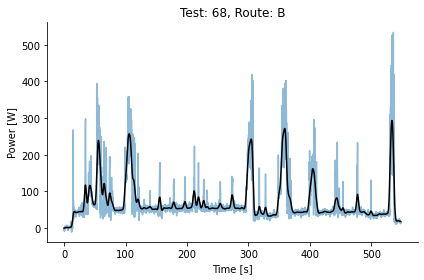

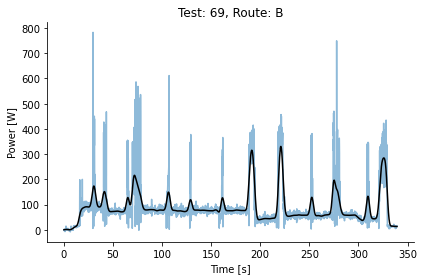

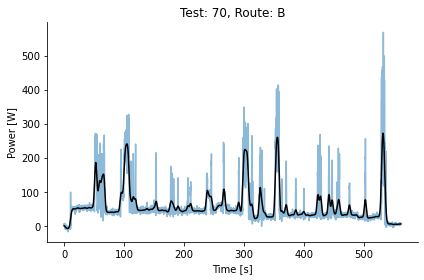

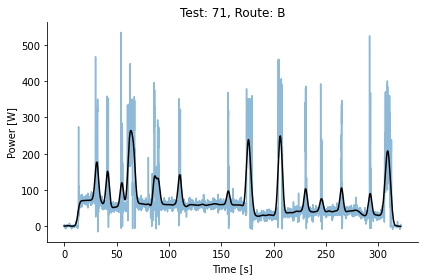

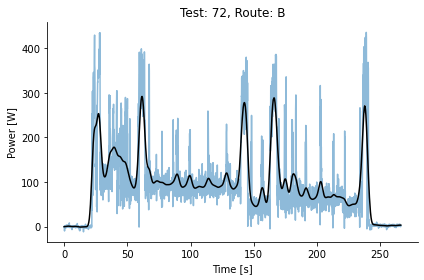

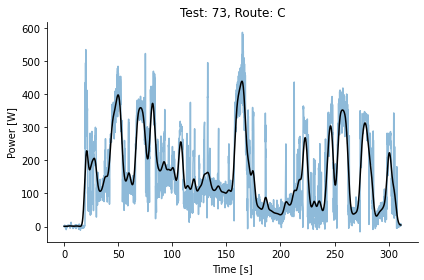

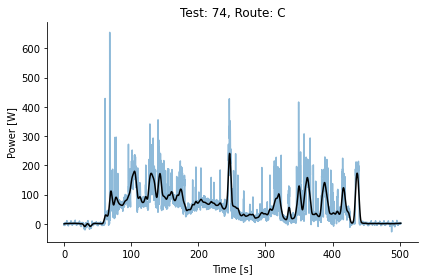

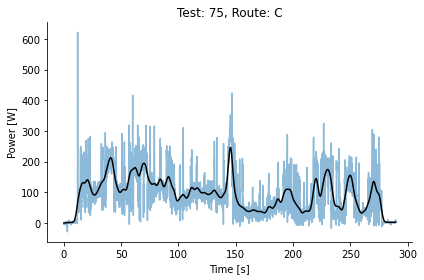

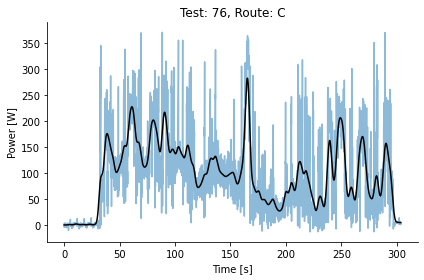

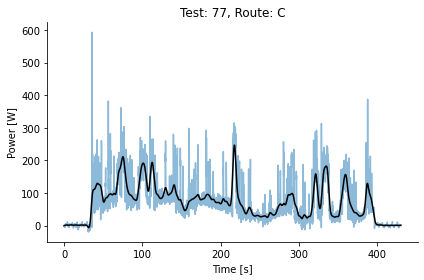

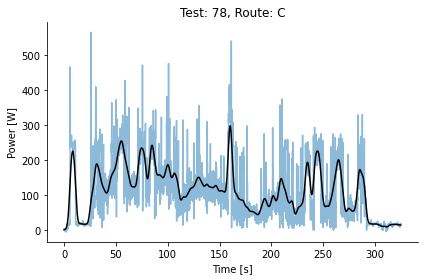

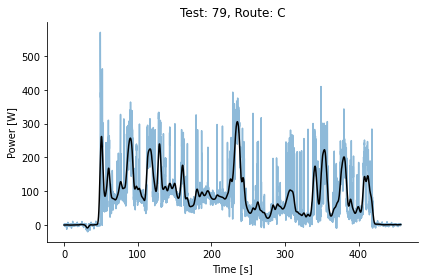

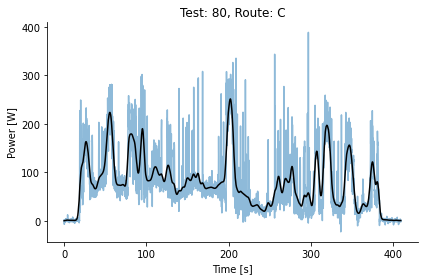

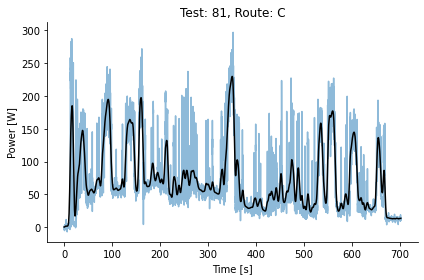

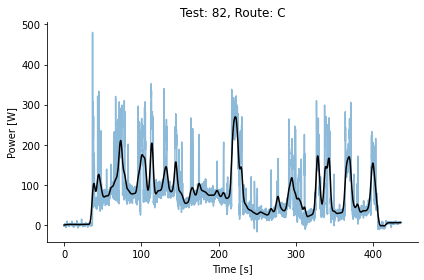

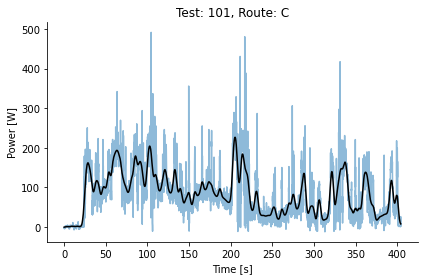

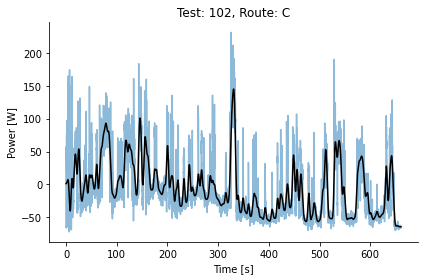

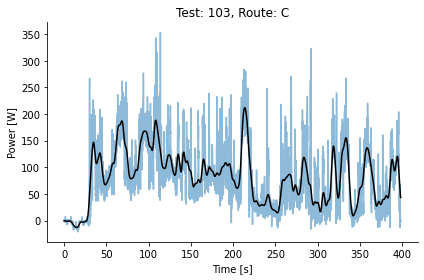

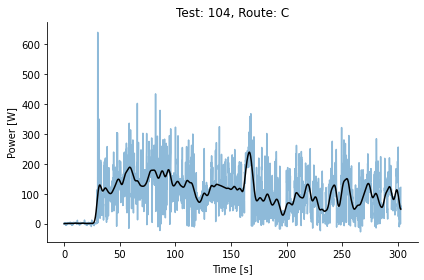

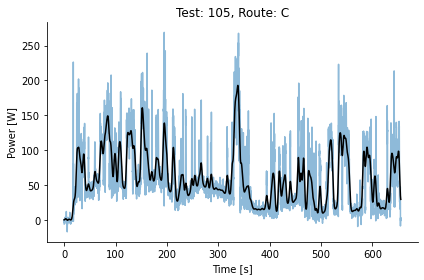

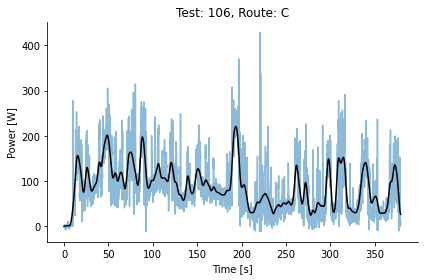

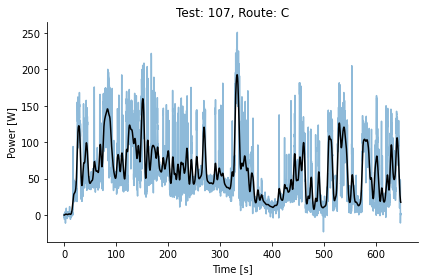

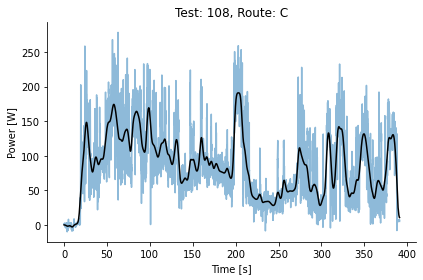

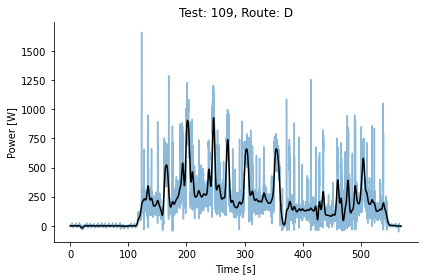

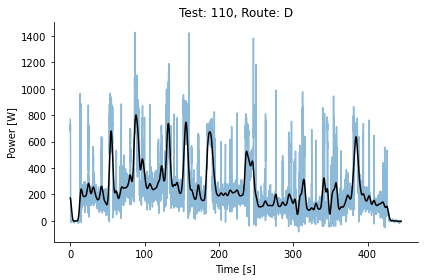

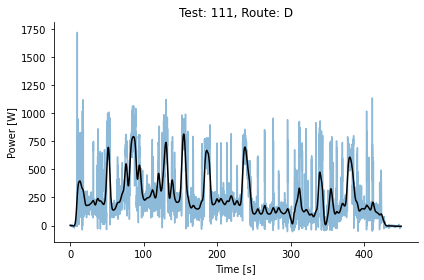

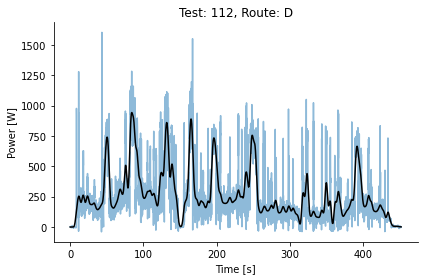

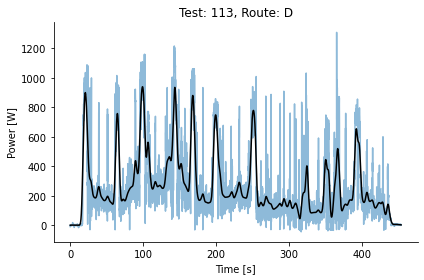

In [4]:
tests = list(set(data.test))
data['power_smooth'] = None
sigma = 15

Energy = []
Route = []
Time = []
Payload = []
Speed = []
Test = []

for test in tests: 
    df = data[data.test==test].copy()
    data.loc[data.test==test, 'power_smooth'] = gaussian_filter(df, sigma).astype(float)
    df = data[data.test==test].copy()
    e = scipy.integrate.simps(df['power_smooth'], x=df["time"], even="avg") / 3600
    r = df.route.min()
    p = df.payload.min()
    t = df.time.max() - df.time.min()
    s = df.speed.min()
    
    Test.append(test)
    Route.append(r)
    Energy.append(e)
    Time.append(t)
    Payload.append(p)
    Speed.append(s)
 
    
    
    plt.plot(df.time, df.power, alpha=0.5)
    plt.plot(df.time, df.power_smooth, color="black")
    plt.title("Test: %d, Route: %s"%(test,r))
    sns.despine(top=True, right=True)
    plt.xlabel('Time [s]')
    plt.ylabel('Power [W]')
    plt.show()
    
summary_energy = pd.DataFrame({"test":Test, "payload":Payload, "speed":Speed, "route":Route,"energy":Energy, "duration":Time})

In [5]:
W_husky = 50
g = 9.81
data['Wt'] = W_husky + data.payload
data['Z_flipped'] = -data.Z
data['power_smooth'] = data['power_smooth'].astype(float)

data['x1'] = data.Wt*g*data.V
data['x2'] = data.Wt*g*data.V*data.Z_flipped+0.5*data.Wt*data.a

    

In [10]:
route = 'A'
df = data[data.route==route]
print(len(set(df.test)))

X = np.array(df[['x1','x2']])
Y = np.array(df['power_smooth'])

#X = sm.add_constant(X)

mod = sm.OLS(Y, X)
res = mod.fit()
df['y_pred'] = res.predict(X)
df['residual'] = df.power_smooth - df.y_pred
print(res.summary())
#c3, c1, c2 = res.params
c1, c2 = res.params

#print(c1,c2, c3)
print(c1,c2)


nbw = 1/c2
Crr = c1*nbw

print("\nRoute: %s \nCrr: %.2f \nnbw: %.2f"%(route, Crr, nbw))
husky_param = pd.DataFrame({"W_husky":W_husky,"g":g,"Crr":Crr, "nbw":nbw},index=[0] )
husky_param.to_csv("Husky_parameters.csv", index=False)

35
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                          2.568e+05
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                        0.00
Time:                        20:52:20   Log-Likelihood:                     -9.3477e+05
No. Observations:              157153   AIC:                                  1.870e+06
Df Residuals:                  157151   BIC:                                  1.870e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

C:\Users\thiag\AppData\Local\Temp/ipykernel_12848/3900058713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_pred'] = res.predict(X)
C:\Users\thiag\AppData\Local\Temp/ipykernel_12848/3900058713.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual'] = df.power_smooth - df.y_pred


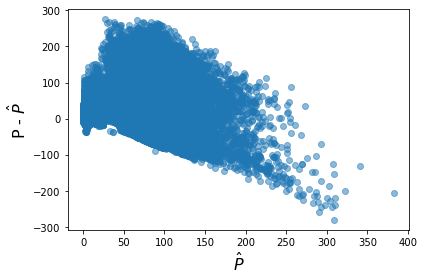

C:\Users\thiag\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


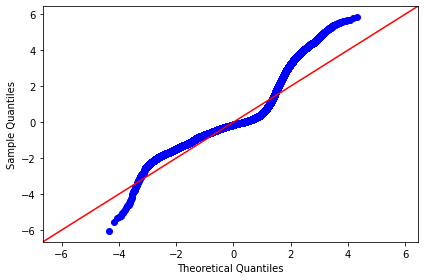

In [7]:
import pylab as py
plt.scatter(df.y_pred, df.power_smooth - df.y_pred, alpha=0.5)
plt.ylabel("P - $\hat{P}$", fontsize=16)
plt.xlabel("$\hat{P}$", fontsize=16)
plt.show()

residuals = (df.residual - df.residual.mean())/df.residual.std() 


sm.qqplot(residuals, line ='45')

py.show()

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


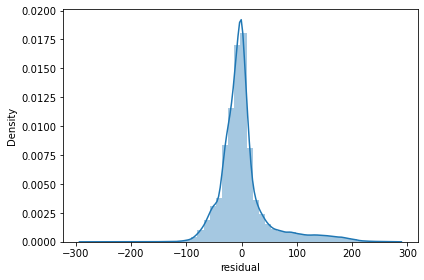

In [8]:
sns.distplot(df.residual)
plt.show()

0.16326356365399664 2.1703284867324477


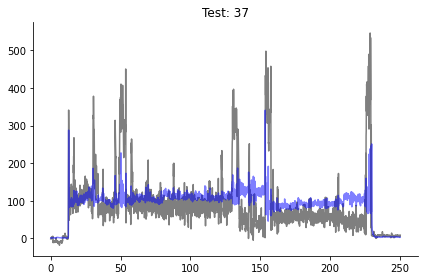

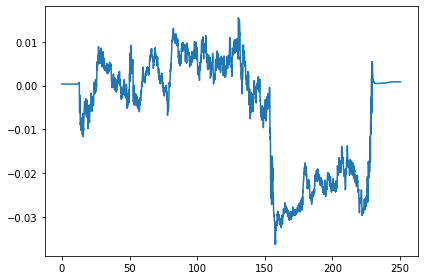

0.16326356365399664 2.1703284867324477


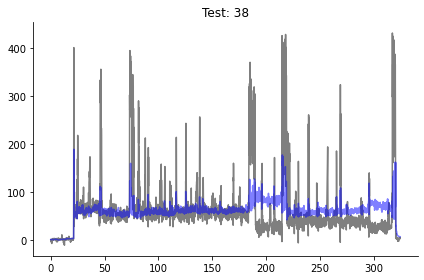

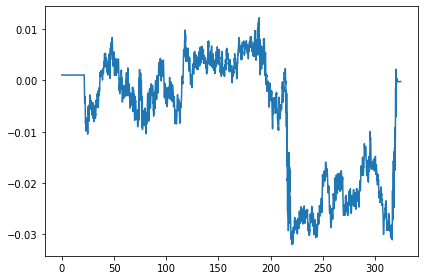

0.16326356365399664 2.1703284867324477


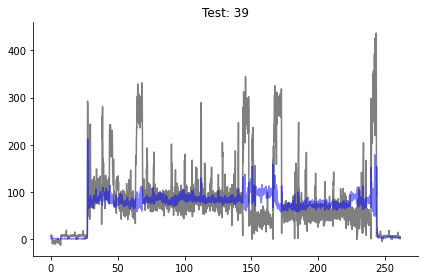

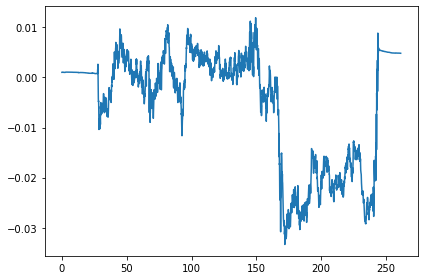

0.16326356365399664 2.1703284867324477


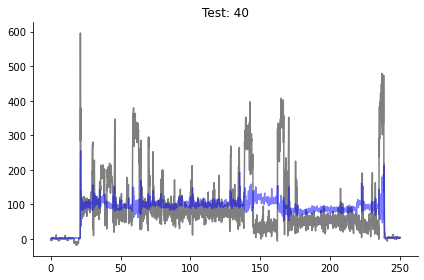

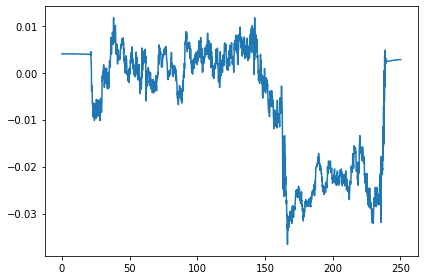

0.16326356365399664 2.1703284867324477


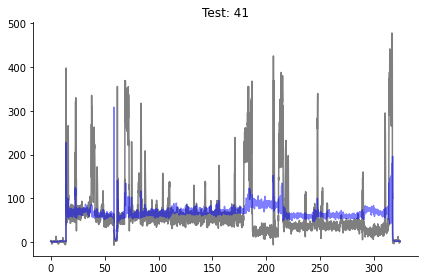

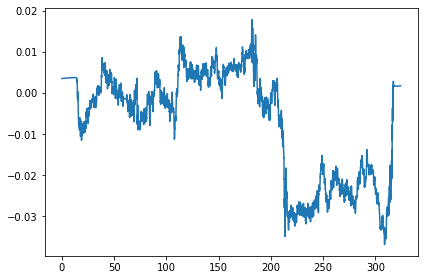

0.16326356365399664 2.1703284867324477


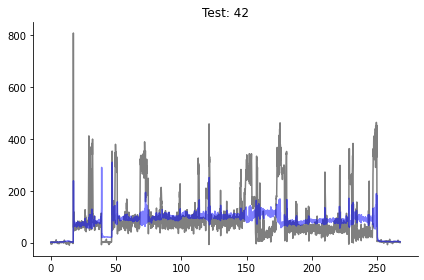

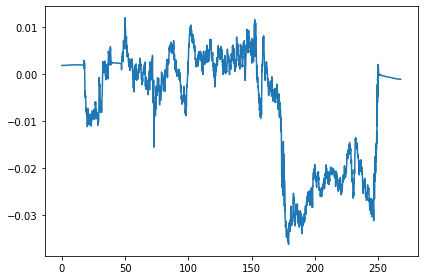

0.16326356365399664 2.1703284867324477


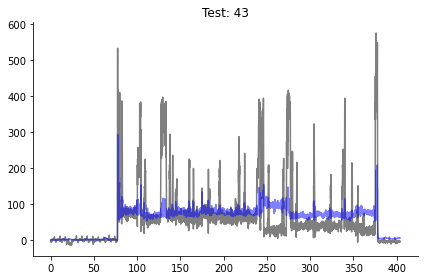

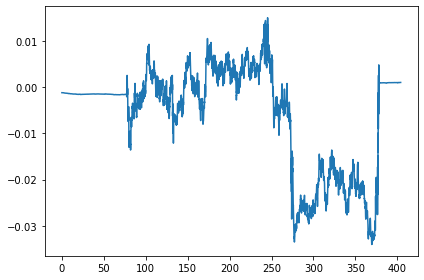

0.16326356365399664 2.1703284867324477


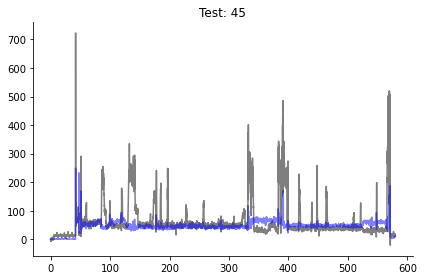

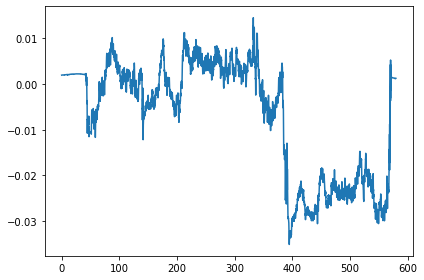

0.16326356365399664 2.1703284867324477


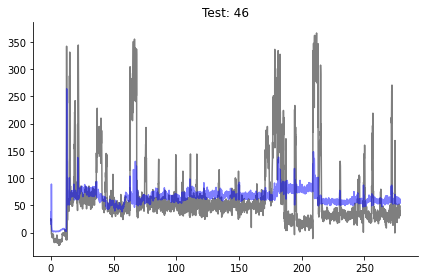

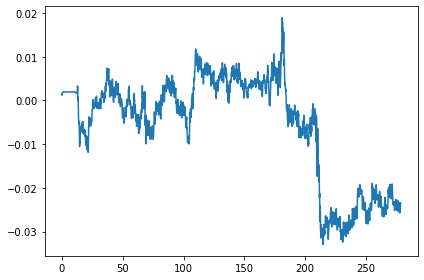

0.16326356365399664 2.1703284867324477


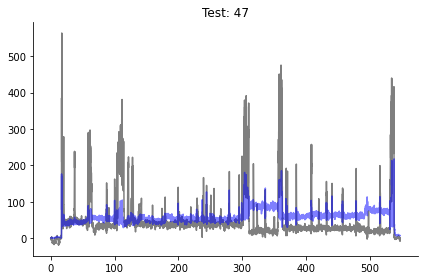

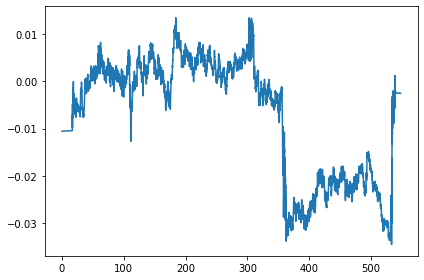

0.16326356365399664 2.1703284867324477


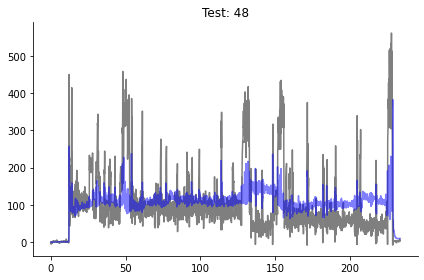

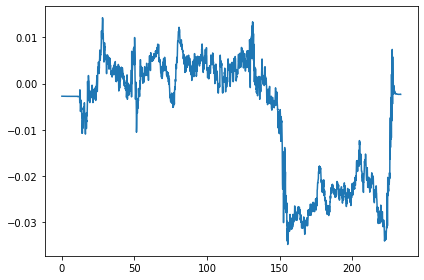

0.16326356365399664 2.1703284867324477


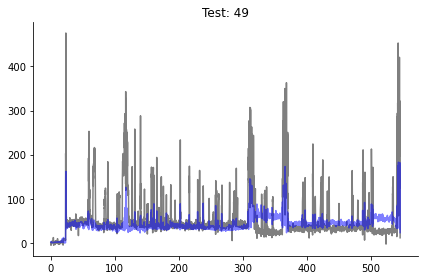

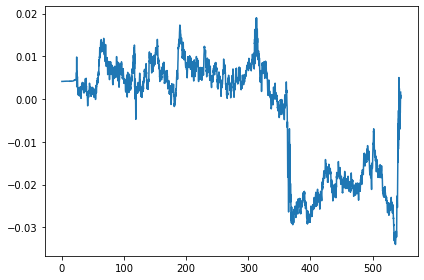

0.16326356365399664 2.1703284867324477


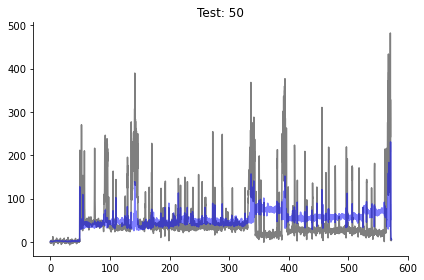

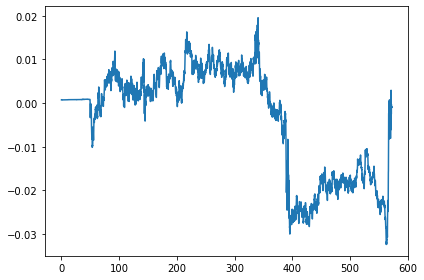

0.16326356365399664 2.1703284867324477


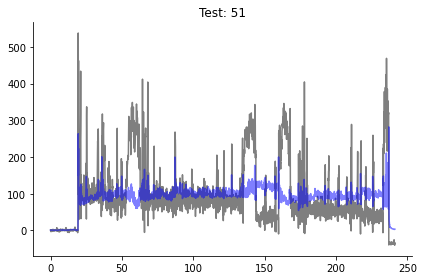

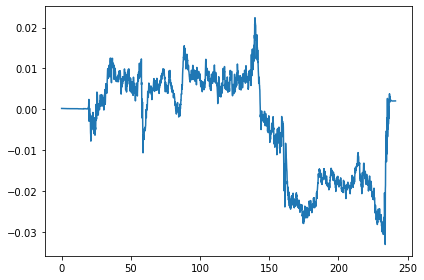

0.16326356365399664 2.1703284867324477


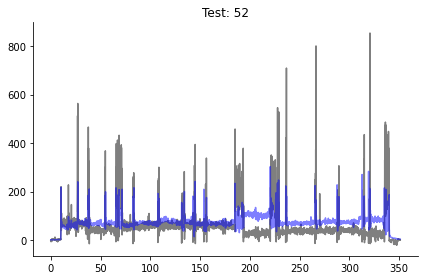

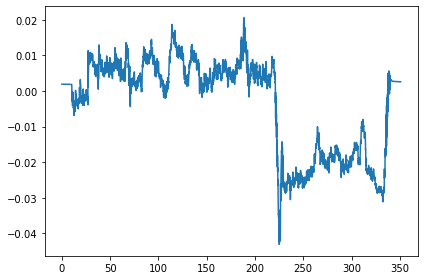

0.16326356365399664 2.1703284867324477


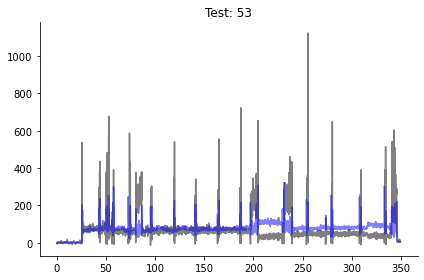

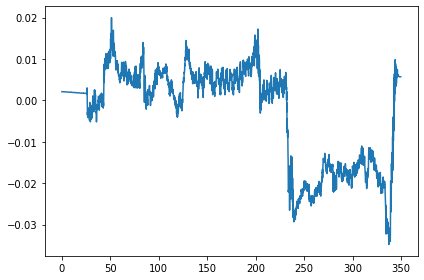

0.16326356365399664 2.1703284867324477


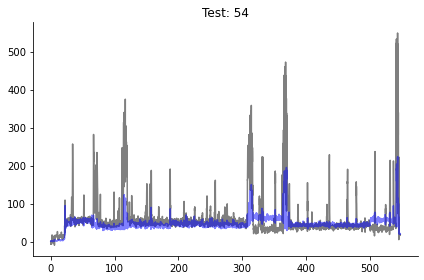

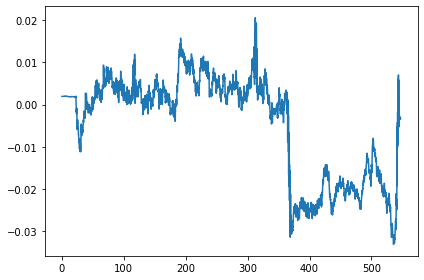

0.16326356365399664 2.1703284867324477


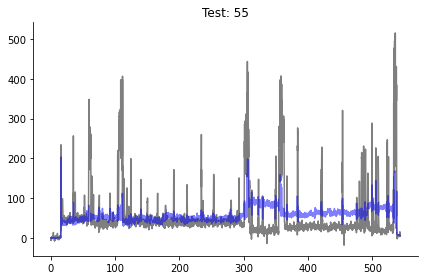

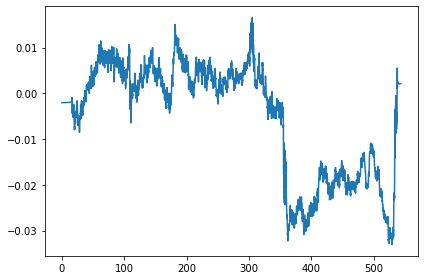

0.16326356365399664 2.1703284867324477


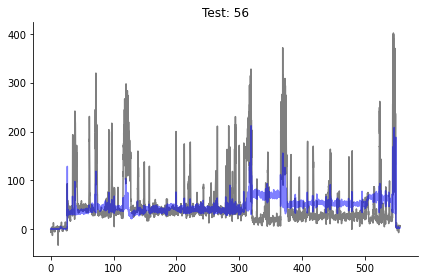

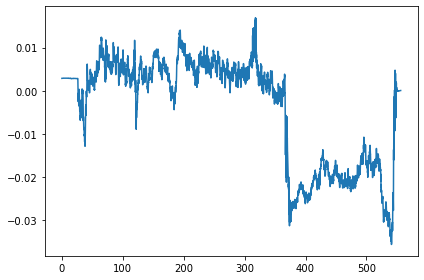

0.16326356365399664 2.1703284867324477


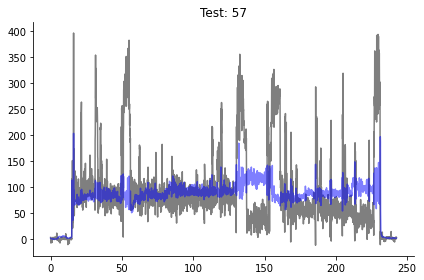

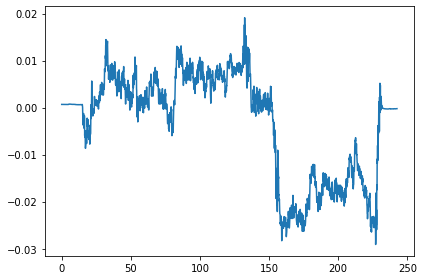

0.16326356365399664 2.1703284867324477


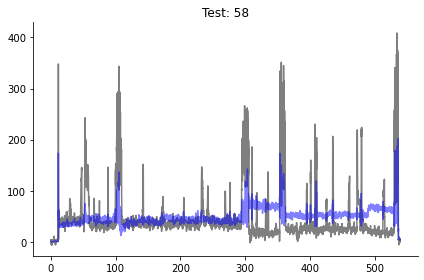

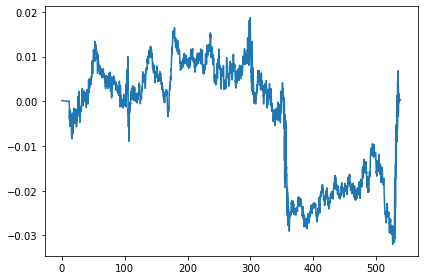

0.16326356365399664 2.1703284867324477


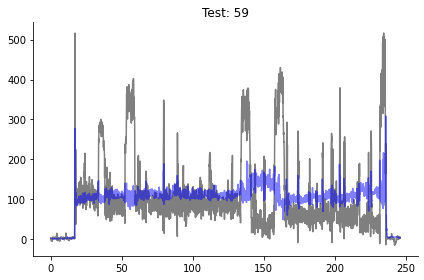

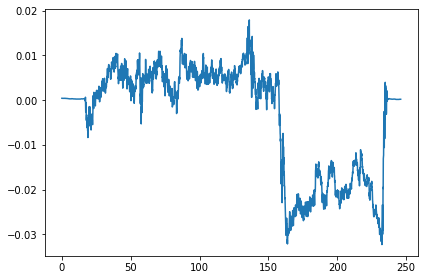

0.16326356365399664 2.1703284867324477


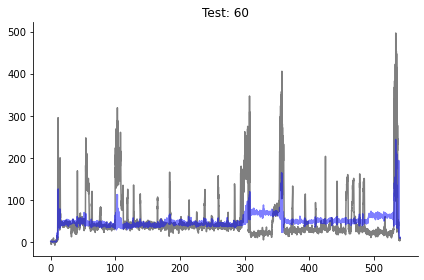

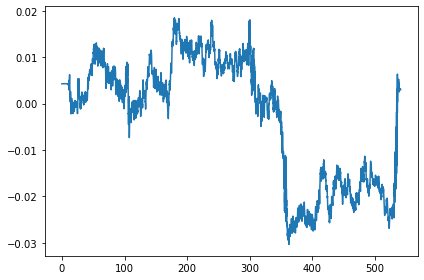

0.16326356365399664 2.1703284867324477


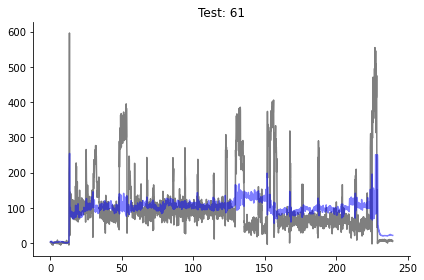

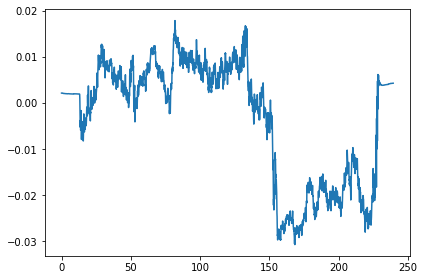

0.16326356365399664 2.1703284867324477


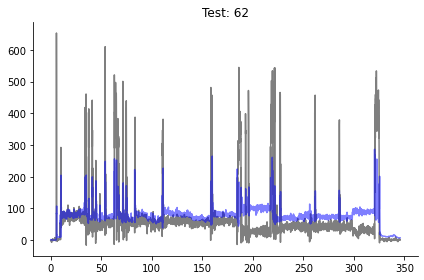

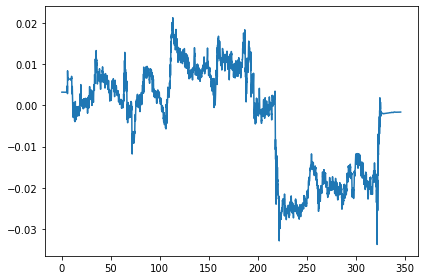

0.16326356365399664 2.1703284867324477


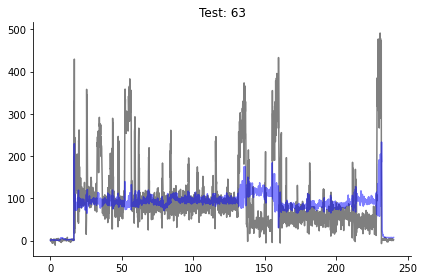

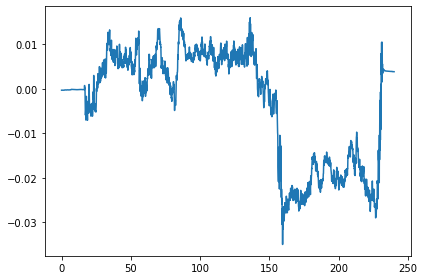

0.16326356365399664 2.1703284867324477


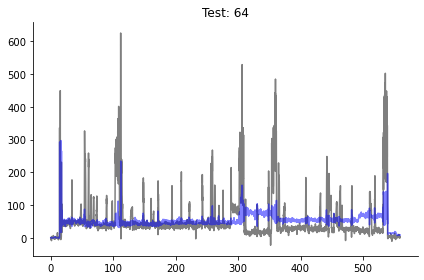

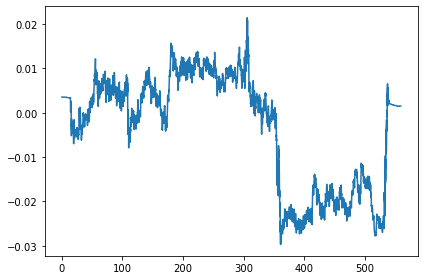

0.16326356365399664 2.1703284867324477


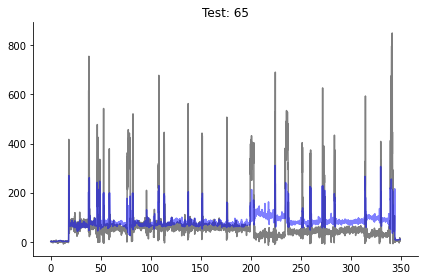

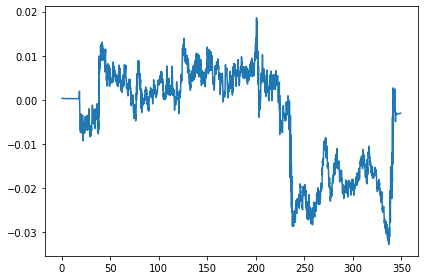

0.16326356365399664 2.1703284867324477


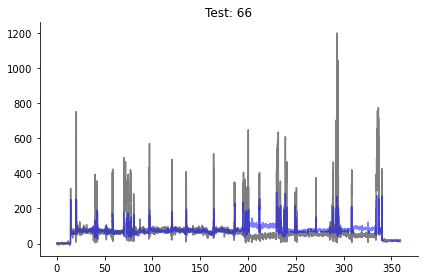

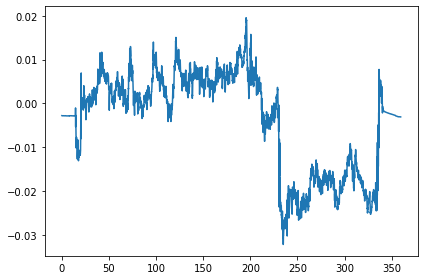

0.16326356365399664 2.1703284867324477


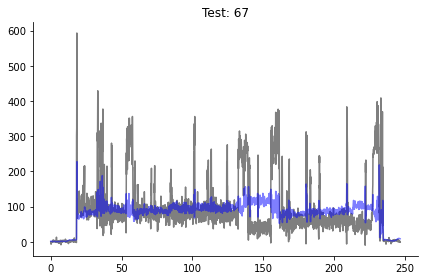

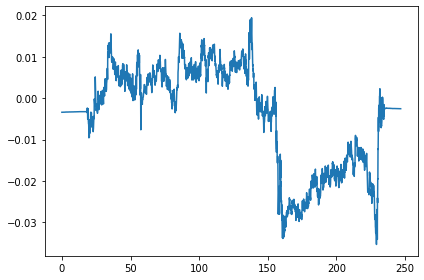

0.16326356365399664 2.1703284867324477


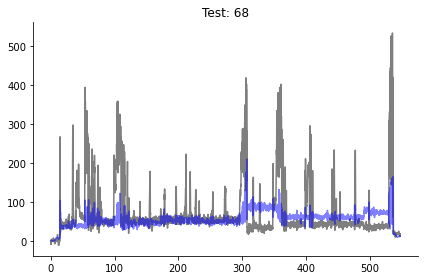

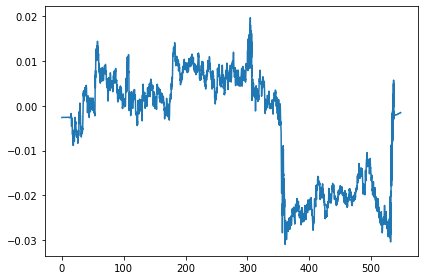

0.16326356365399664 2.1703284867324477


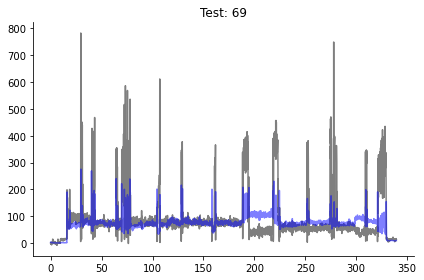

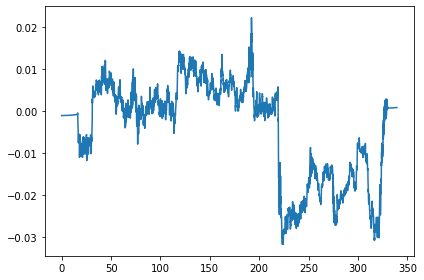

0.16326356365399664 2.1703284867324477


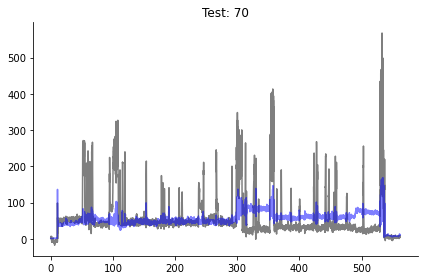

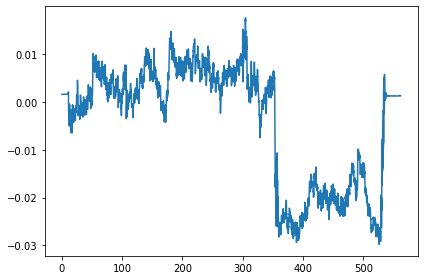

0.16326356365399664 2.1703284867324477


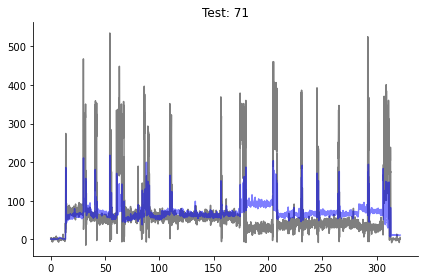

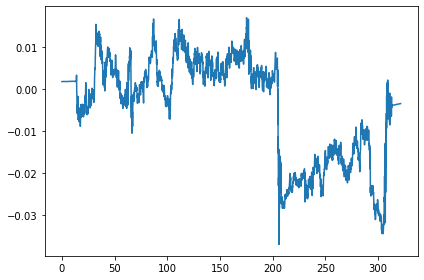

0.16326356365399664 2.1703284867324477


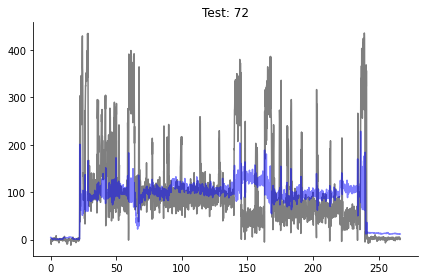

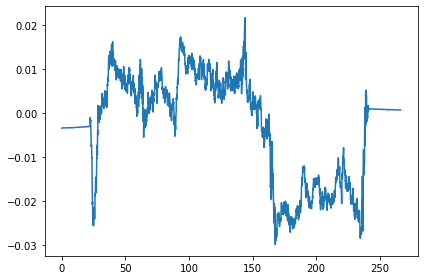

In [34]:
B = data[data.route=="B"].copy()
tests = list(set(B.test))

E_real, E_hat, ARE = [], [], []

for test in tests:
    df = B[B.test==test].copy()
    print(c1,c2)
    
    #df['p_hat'] = df.x1*c1 + df.x2*c2 + c3
    df['p_hat'] = df.x1*c1 + df.x2*c2 
    e_real = scipy.integrate.simps(y=df.power_smooth, x=df["time"], even="avg") / 3600
    #e_real = scipy.integrate.simps(y=df.power, x=df["time"], even="avg") / 3600
    e_hat = scipy.integrate.simps(y=df.p_hat, x=df["time"], even="avg") / 3600
    are = np.fabs((e_real-e_hat)/e_real)
    
    #plt.plot(df.time, df.power_smooth, color="black")
    plt.plot(df.time, df.power, color="black", alpha=0.5)
    plt.plot(df.time, df.p_hat, color="blue", alpha=0.5)
    sns.despine(top=True, right=True)
    plt.title("Test: %d"%test)
    plt.show()
    
    E_real.append(e_real)
    E_hat.append(e_hat)
    ARE.append(are)
    
    plt.plot(df.time, df.Z_flipped)
    plt.show()
    
    
    


In [35]:
summary = pd.DataFrame({"e_real":E_real, "e_hat":E_hat, "ARE": ARE})
summary['route'] = "B"
print(len(tests))



35


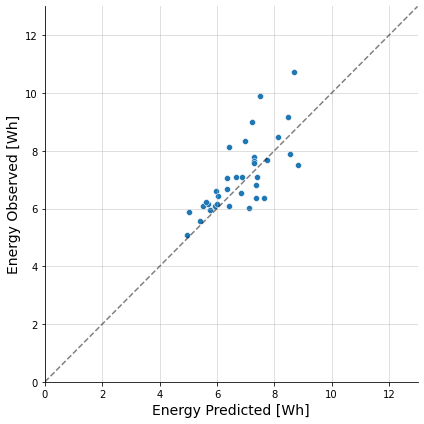

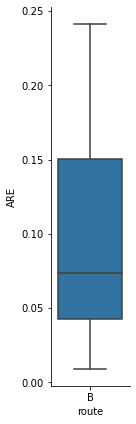

In [36]:
figure, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='e_hat', y='e_real', data = summary)
plt.plot([0,13],[0,13], '--', color="black", alpha=0.5)
plt.xlabel("Energy Predicted [Wh]", fontsize=14)
plt.ylabel("Energy Observed [Wh]", fontsize=14)
plt.xlim(0,13)
plt.ylim(0,13)
sns.despine(top=True, right=True)
plt.grid(which="Major", alpha=0.5)

plt.show()

figure, ax = plt.subplots(figsize=(2, 6))
sns.boxplot(x="route", y="ARE", data=summary)
sns.despine(top=True, right=True)

plt.show()

0.09271098002286665 0.06585531809483043


C:\Users\thiag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


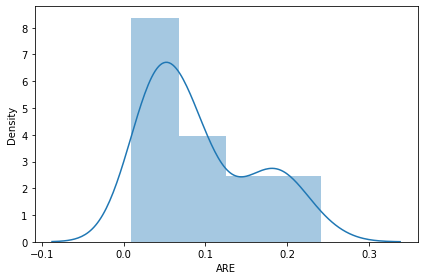

In [37]:
print(summary.ARE.mean(), summary.ARE.std())
sns.distplot(summary.ARE)
plt.show()

0.09271098002286665 0.06585531809483043


C:\Users\thiag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


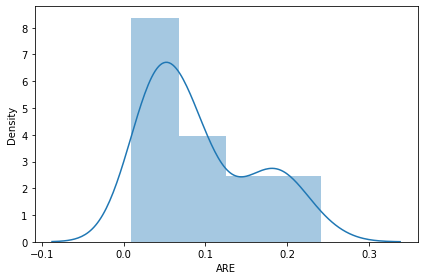

In [38]:
print(summary.ARE.mean(), summary.ARE.std())
sns.distplot(summary.ARE)
plt.show()

In [39]:
def energy_analysis(data, test, rho, g, Crr, Cd, A, nbw, nbr, Lh, W_husky):
    
    df = data[data.test == test].copy()
    df = df.reset_index()
    sigma = 15
    df['power_smooth'] = scipy.ndimage.filters.gaussian_filter(df.power,sigma)
    Drag, Friction, Slope, Acceleration = [], [], [], []    
    p_hat = []
    for i in range(len(df)):
        v = df.loc[i,'V']
        Wt = W_husky + df.payload.mean()
        
        Z = -df.loc[i,'Z']
        #if Z<0:
        #   Z = 0      
        
        a = df.loc[i, 'a']
        p, drag, friction, slope, acceleration = power(rho, Cd, A, v, Crr, Wt, g, Z, nbw, nbr, a, Lh)
        Drag.append(drag)
        Friction.append(friction)
        Slope.append(slope)
        Acceleration.append(acceleration)
        p_hat.append(p)
    
    plt.plot(df.time,Drag, label='drag', color='gray')
    #plt.plot(df.time,Friction, label='friction')
    #plt.plot(df.time,Slope, label='slope')
    #plt.plot(df.time,Acceleration, label='acceleration')
    sns.despine(top=True, right=True)
    plt.title("Drag")
    plt.ylabel("Power [W]", fontsize=14)
    plt.xlabel("Time [s]", fontsize=14)
    plt.show()
    
    
    plt.plot(df.time,Friction, label='friction', color='red')
    #plt.plot(df.time,Slope, label='slope')
    #plt.plot(df.time,Acceleration, label='acceleration')
    sns.despine(top=True, right=True)
    plt.title("Friction")
    plt.ylabel("Power [W]", fontsize=14)
    plt.xlabel("Time [s]", fontsize=14)
    plt.show()
    
    
    plt.plot(df.time,Slope, label='slope', color='orange')
    #plt.plot(df.time,Acceleration, label='acceleration')
    sns.despine(top=True, right=True)
    plt.title("Slope")
    plt.ylabel("Power [W]", fontsize=14)
    plt.xlabel("Time [s]", fontsize=14)
    plt.show()
    
    
    plt.plot(df.time,Acceleration, label='acceleration', color='#89CFF0')
    sns.despine(top=True, right=True)
    plt.title("Acceleration")
    plt.ylabel("Power [W]", fontsize=14)
    plt.xlabel("Time [s]", fontsize=14)
    plt.show()
    
    
    df['p_hat'] = p_hat
    e_real = scipy.integrate.simps(y=df.power_smooth, x=df["time"], even="avg") / 3600
    e_hat = scipy.integrate.simps(y=df.p_hat, x=df["time"], even="avg") / 3600
    ARE = np.fabs((e_real-e_hat)/e_real)
    print("E_real: %.4f Wh,E_hat: %.4f Wh, ARE: %.2f %%"%(e_real, e_hat, ARE*100))
    fig, ax1 = plt.subplots()
    
    color = "tab:black"
    ax1.set_xlabel('time [s]')
    ax1.set_ylabel("Power Observed [W]", fontsize=14)
    ax1.plot(df.time, df.power_smooth, color="black")
    ax1.tick_params(axis='y', labelcolor="black")
    ax1.set_ylim(0,600)

    ax2 = ax1.twinx()

    color = "tab:blue"
    ax2.set_ylabel("p_hat")
    ax2.plot(df.time, df.p_hat, color="#0000FF", alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylabel("$\hat{P}$ [W]", fontsize=14)
    ax2.set_ylim(0,600)

    fig.tight_layout()
    sns.despine(top=True, right=False)
    plt.title("Test #%d"%(test))
    plt.show()
    
    
    e_drag = scipy.integrate.simps(Drag, x=df["time"], even="avg") / 3600
    e_friction = scipy.integrate.simps(Friction, x=df["time"], even="avg") / 3600 
    e_slope = scipy.integrate.simps(Slope, x=df["time"], even="avg")  / 3600
    e_acceleration = scipy.integrate.simps(Acceleration, x=df["time"], even="avg") / 3600
    
    print("Drag: %.4f Wh, friction: %.4f Wh, slope: %.4f Wh, acceleration: %.4f Wh"%(e_drag, e_friction, e_slope, e_acceleration))        
    sns.barplot(x=["drag", 'friction', 'slope', 'acceleration'], y=[e_drag, e_friction, e_slope, e_acceleration])
    sns.despine(top=True, right=True)
    plt.ylabel("Energy [Wh]")
    plt.show()
    return e_real, e_hat, ARE

def power(rho, Cd, A, v, Crr, Wt, g, Z, nbw, nbr, a, Lh):
    drag = 0.5*rho*Cd*A*(v**3)
    friction = Crr*Wt*g*v
    slope = Wt*g*v*Z
    acceleration = 0.5*Wt*v*a
    power = (drag + friction + slope)/nbw + acceleration*(1/nbw - nbw*nbr) + Lh
    return power, drag, friction, slope, acceleration    
    

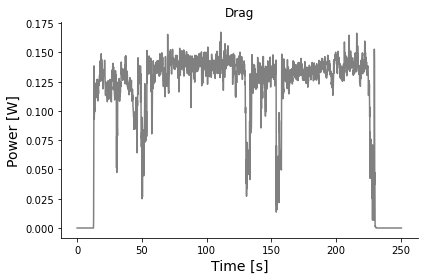

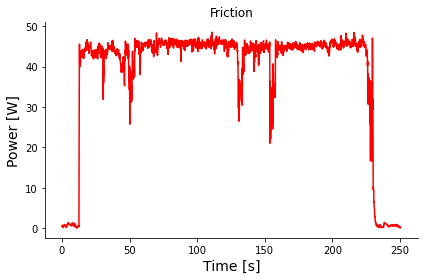

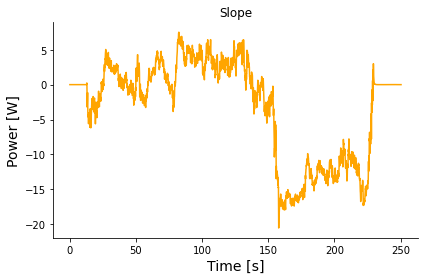

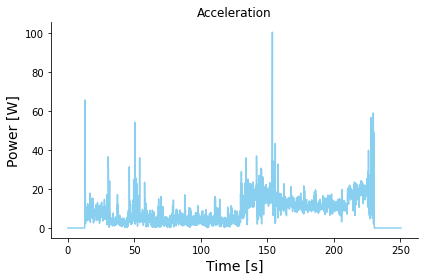

E_real: 6.0747 Wh,E_hat: 6.6100 Wh, ARE: 8.81 %


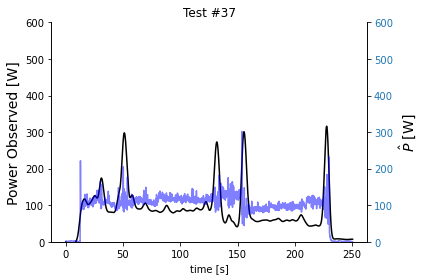

Drag: 0.0077 Wh, friction: 2.6660 Wh, slope: -0.2201 Wh, acceleration: 0.5871 Wh


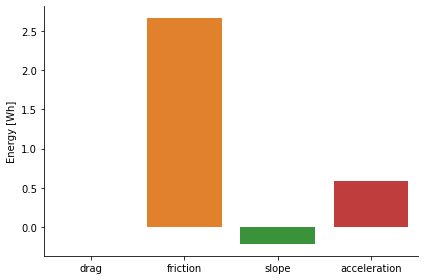

(6.07471750456736, 6.610004026363976, 0.08811710526360333)

In [40]:
rho = 1.2 # kg/m^3
g = 9.81 # m/s^2
Crr = 0.08 # https://www.school-for-champions.com/science/friction_rolling_coefficient.htm#.YrB9HHbMJaY
Cd = 2.1  # Rectangular box https://www.engineeringtoolbox.com/drag-coefficient-d_627.html
A = (0.33-0.13)*(0.67)  # m^2 approximately 
nbw = 0.46
nbr = 0.0
Lh = 0
W_husky = 50
test = 37

energy_analysis(data, test, rho, g, Crr, Cd, A, nbw, nbr, Lh, W_husky)

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


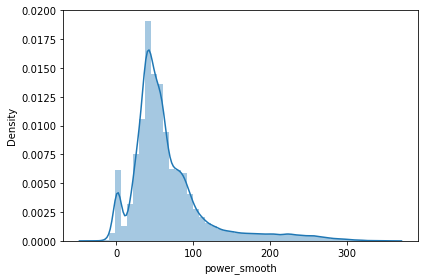

In [41]:
sns.distplot(B.power_smooth)
plt.show()

0.16326356365399664 2.1703284867324477


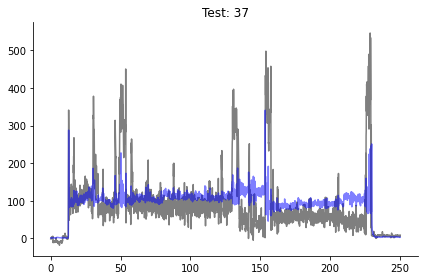

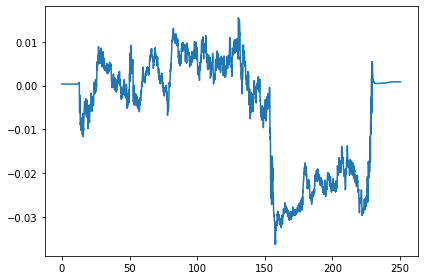

0.16326356365399664 2.1703284867324477


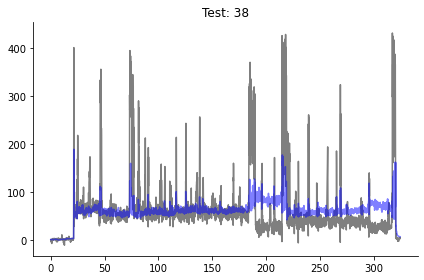

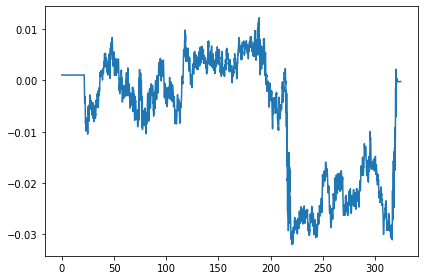

0.16326356365399664 2.1703284867324477


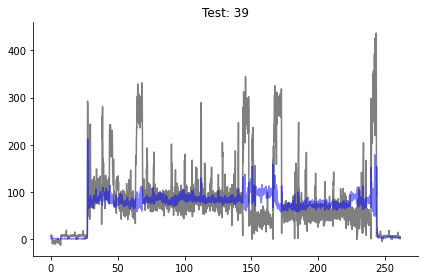

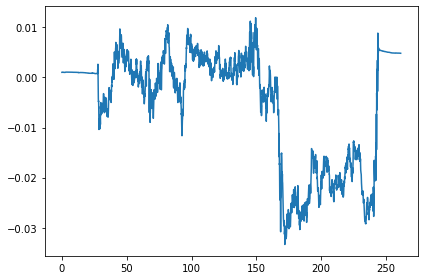

0.16326356365399664 2.1703284867324477


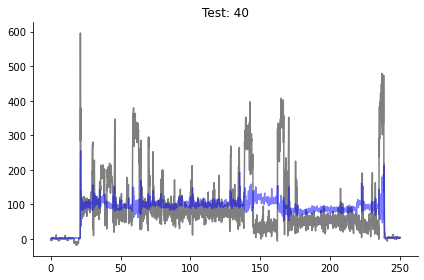

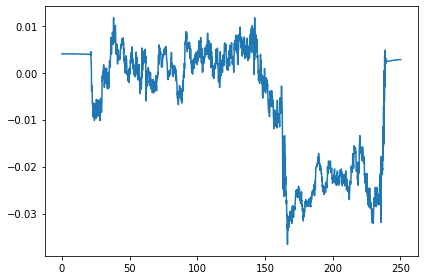

0.16326356365399664 2.1703284867324477


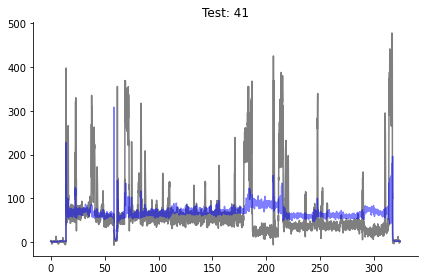

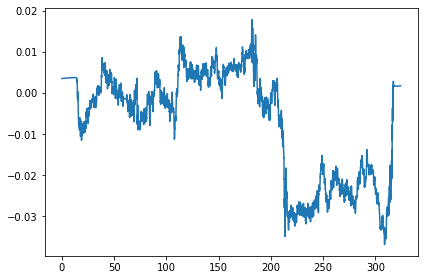

0.16326356365399664 2.1703284867324477


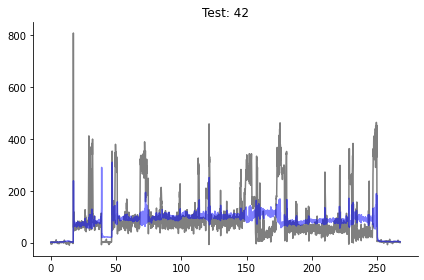

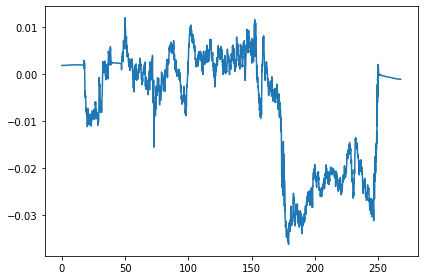

0.16326356365399664 2.1703284867324477


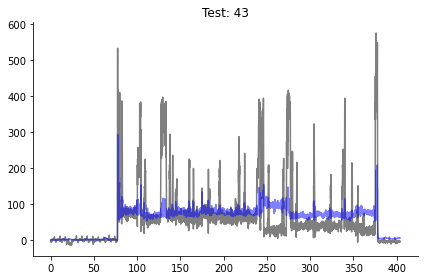

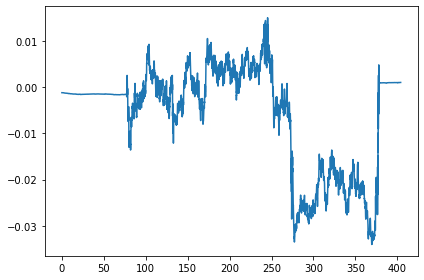

0.16326356365399664 2.1703284867324477


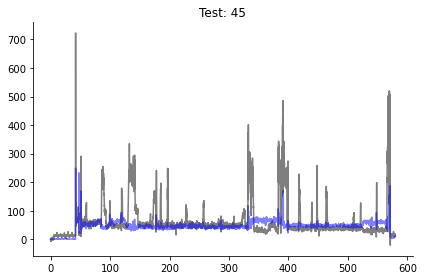

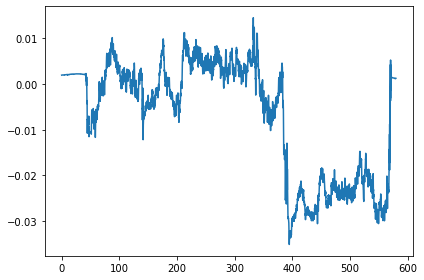

0.16326356365399664 2.1703284867324477


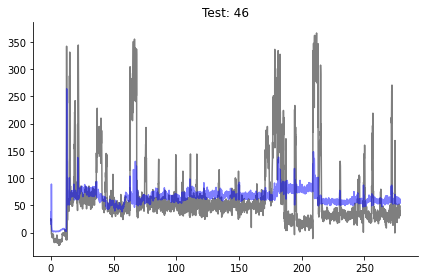

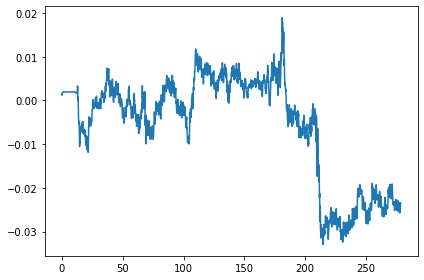

0.16326356365399664 2.1703284867324477


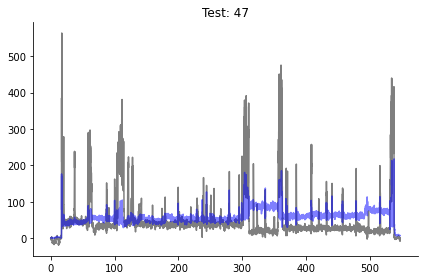

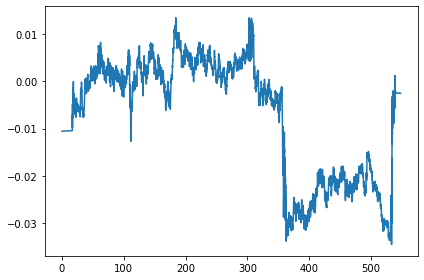

0.16326356365399664 2.1703284867324477


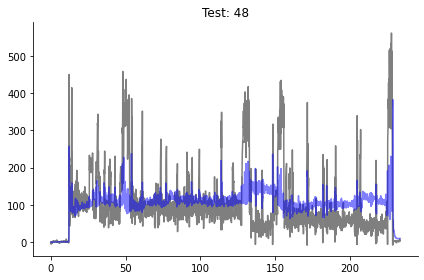

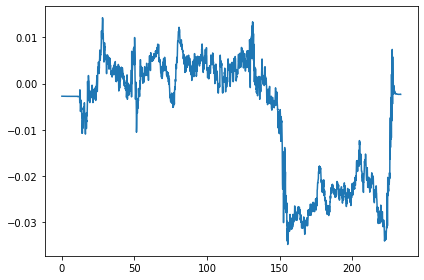

0.16326356365399664 2.1703284867324477


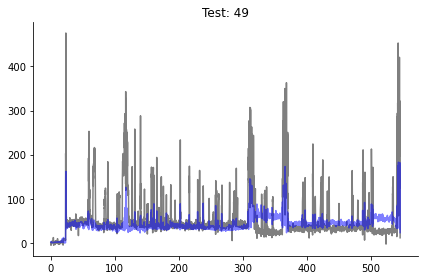

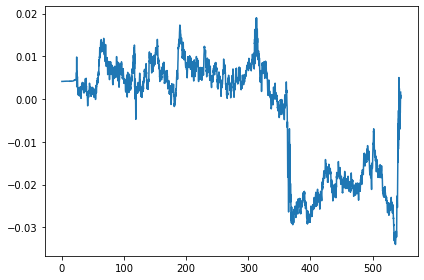

0.16326356365399664 2.1703284867324477


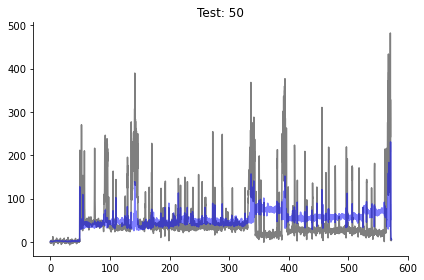

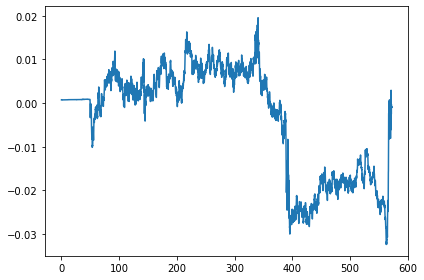

0.16326356365399664 2.1703284867324477


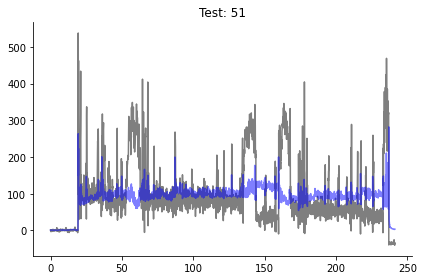

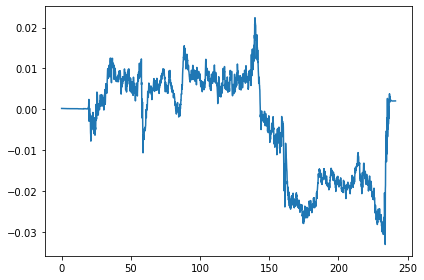

0.16326356365399664 2.1703284867324477


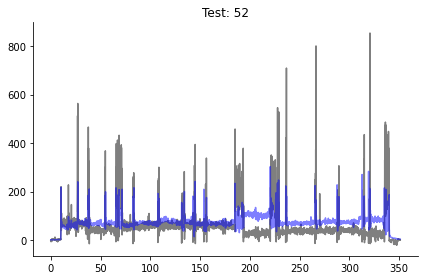

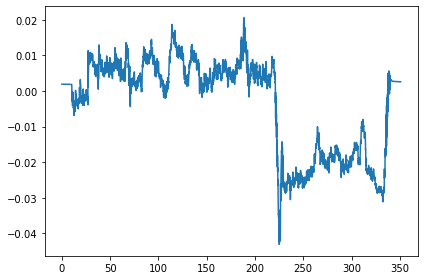

0.16326356365399664 2.1703284867324477


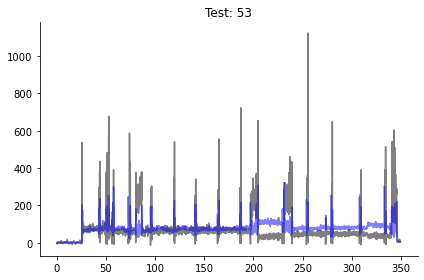

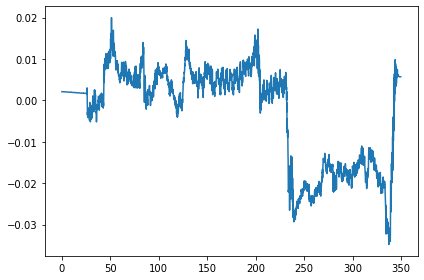

0.16326356365399664 2.1703284867324477


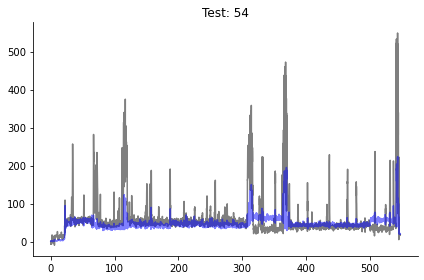

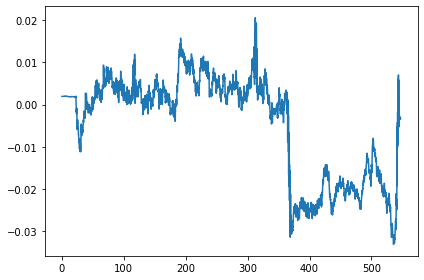

0.16326356365399664 2.1703284867324477


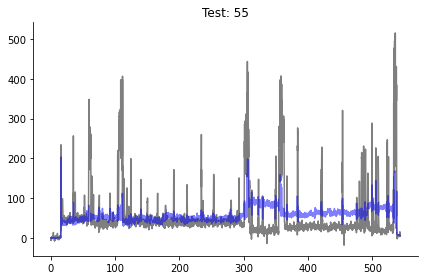

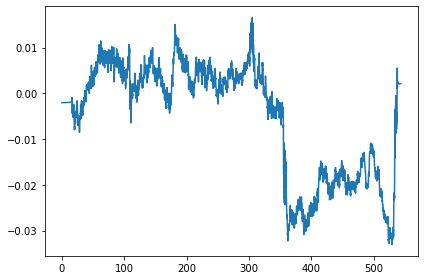

0.16326356365399664 2.1703284867324477


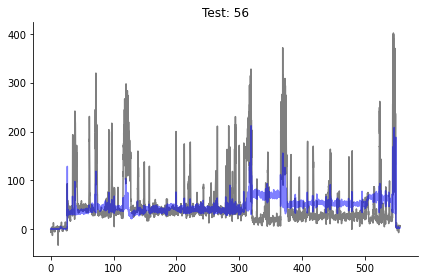

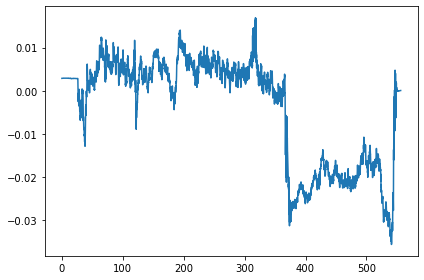

0.16326356365399664 2.1703284867324477


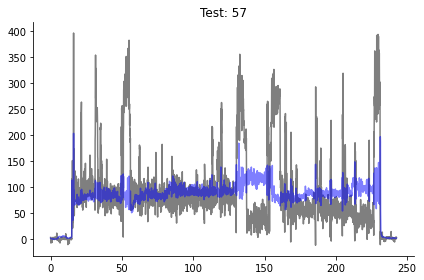

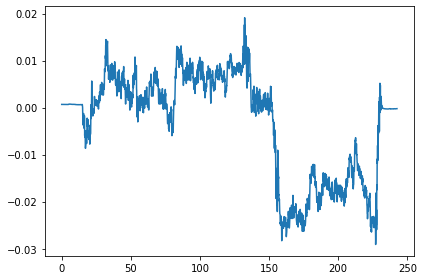

0.16326356365399664 2.1703284867324477


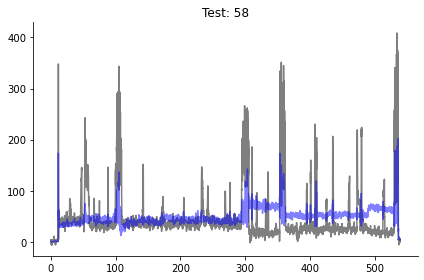

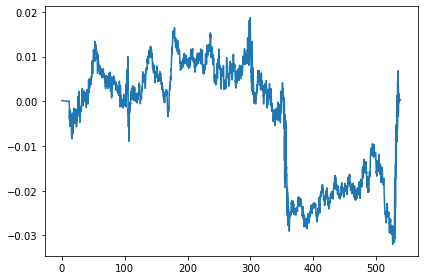

0.16326356365399664 2.1703284867324477


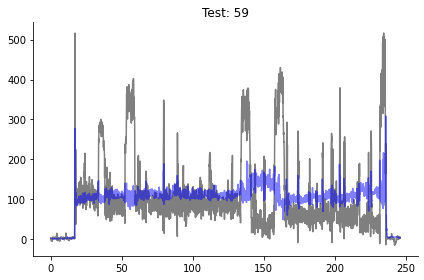

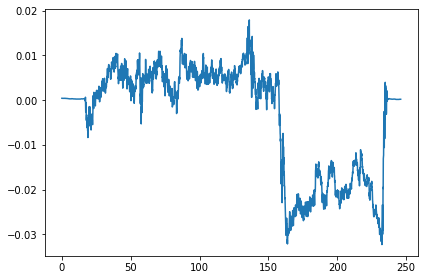

0.16326356365399664 2.1703284867324477


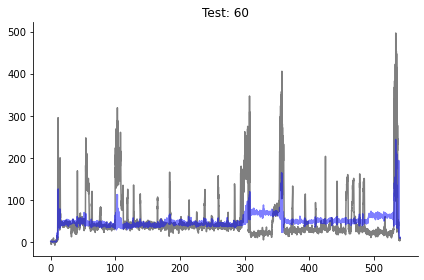

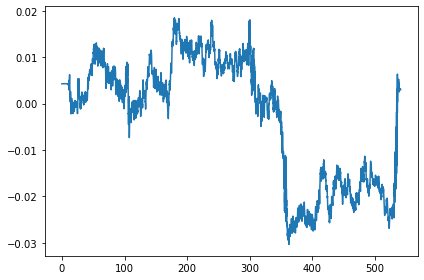

0.16326356365399664 2.1703284867324477


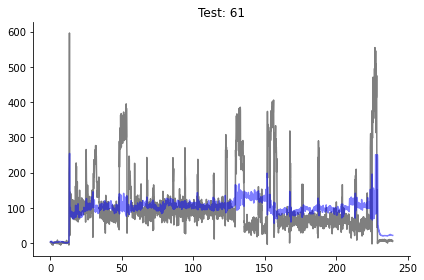

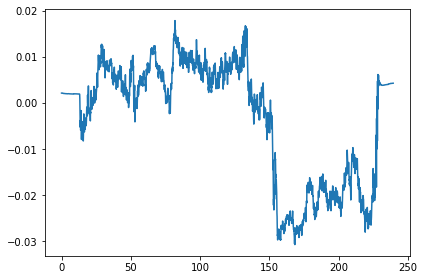

0.16326356365399664 2.1703284867324477


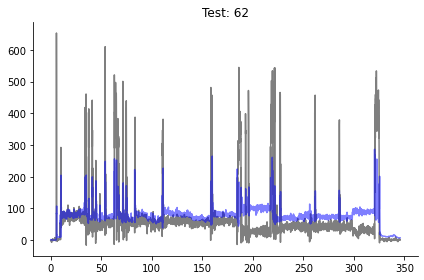

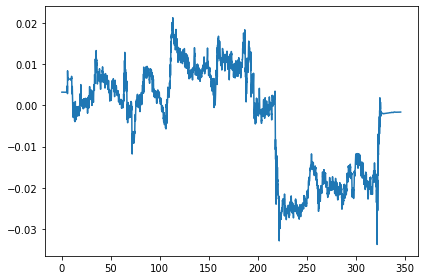

0.16326356365399664 2.1703284867324477


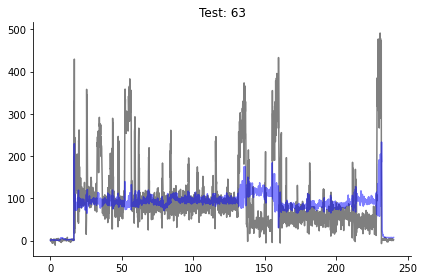

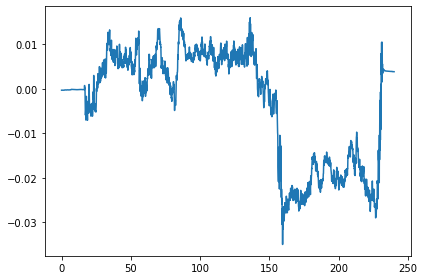

0.16326356365399664 2.1703284867324477


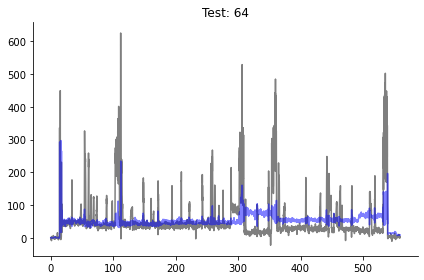

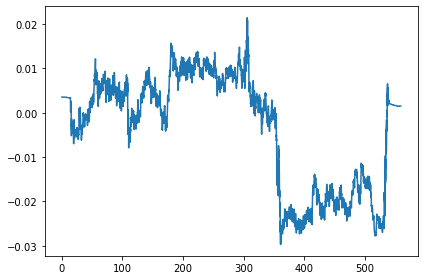

0.16326356365399664 2.1703284867324477


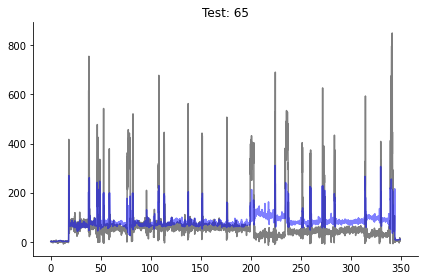

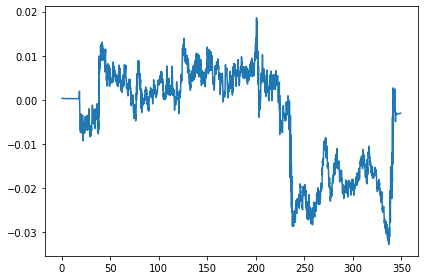

0.16326356365399664 2.1703284867324477


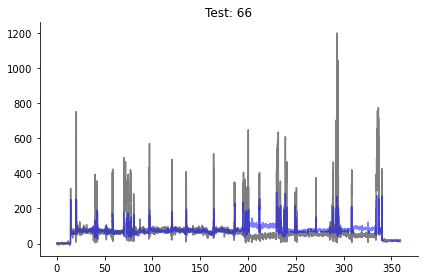

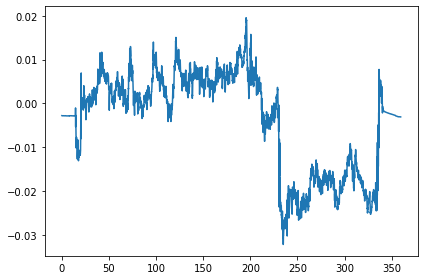

0.16326356365399664 2.1703284867324477


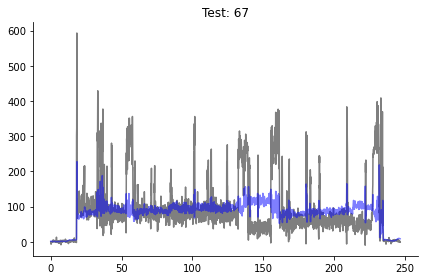

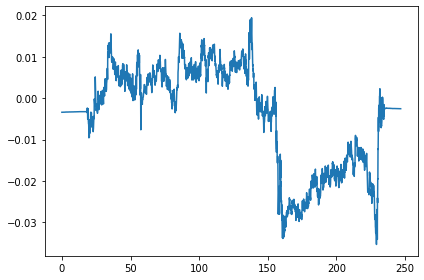

0.16326356365399664 2.1703284867324477


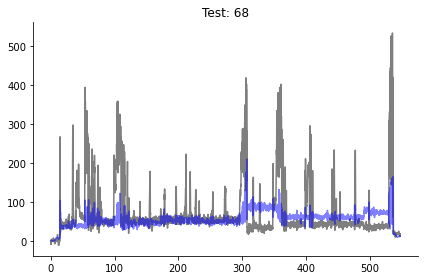

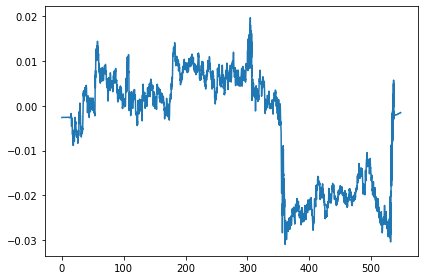

0.16326356365399664 2.1703284867324477


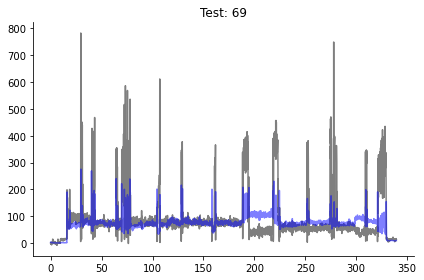

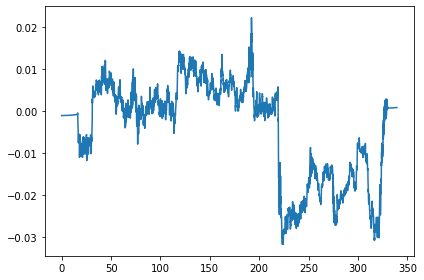

0.16326356365399664 2.1703284867324477


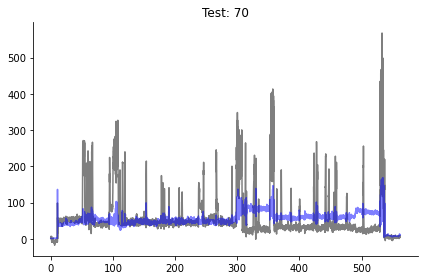

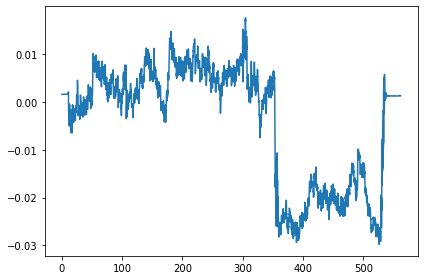

0.16326356365399664 2.1703284867324477


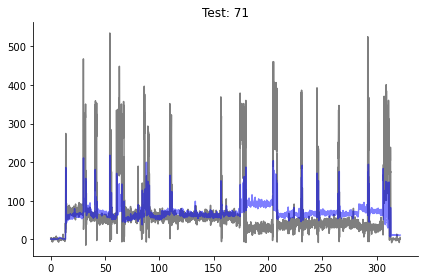

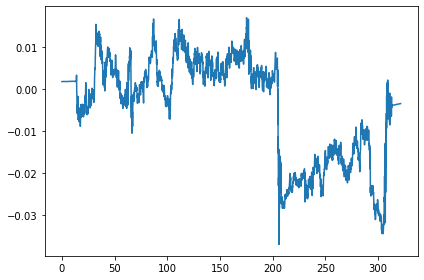

0.16326356365399664 2.1703284867324477


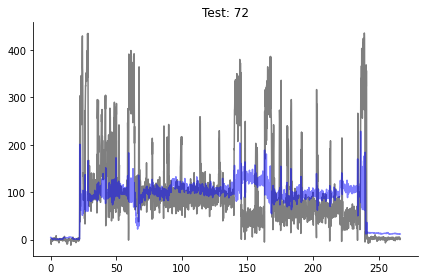

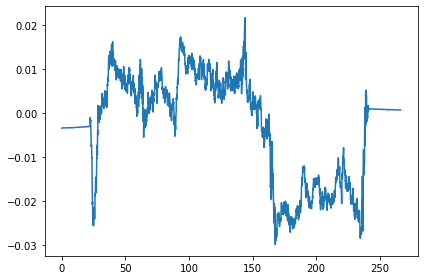

In [46]:

B = data[data.route=="B"].copy()
tests = list(set(B.test))

E_real, E_hat, ARE = [], [], []

for test in tests:
    df = B[B.test==test].copy()
    print(c1,c2)
    
    #df['p_hat'] = df.x1*c1 + df.x2*c2 + c3
    df['p_hat'] = df.x1*c1 + df.x2*c2 
    e_real = scipy.integrate.simps(y=df.power_smooth, x=df["time"], even="avg") / 3600
    #e_real = scipy.integrate.simps(y=df.power, x=df["time"], even="avg") / 3600
    e_hat = scipy.integrate.simps(y=df.p_hat, x=df["time"], even="avg") / 3600
    are = np.fabs((e_real-e_hat)/e_real)
    
    #plt.plot(df.time, df.power_smooth, color="black")
    plt.plot(df.time, df.power, color="black", alpha=0.5)
    plt.plot(df.time, df.p_hat, color="blue", alpha=0.5)
    sns.despine(top=True, right=True)
    plt.title("Test: %d"%test)
    plt.show()
    
    E_real.append(e_real)
    E_hat.append(e_hat)
    ARE.append(are)
    
    plt.plot(df.time, df.Z_flipped)
    plt.show()
    